In [1]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Observations after the Experiments:
### Choice of Linkage and Features Trade-off:

The choice of linkage method and the number of features to consider in alignment involve a trade-off.
Single linkage, while producing taller dendrograms, may capture finer details but can also lead to more noise.
Ward linkage tends to produce more balanced and compact clusters but may not capture fine-grained differences.

### Linkage Methods Impact on Dendrogram Height:

The choice of linkage methods (single, complete, average, centroid, ward) has a significant impact on the resulting dendrogram.
Single linkage tends to produce the tallest dendrogram, followed by complete, average, centroid, and ward in descending order of dendrogram height.
The choice of linkage method affects the cluster structure and the grouping of shapes in the dendrogram.

### Subset of Features and Dendrogram Height:

Reducing the number of features used for alignment decreases the height of the dendrogram.
Smaller subsets of features lead to shorter dendrograms, indicating that the alignment is more focused on specific shape characteristics.
The choice of features for alignment can influence the quality and efficiency of shape alignment.

## Write a Clustering Class

In [2]:
class HC:
    def __init__(self, data, method, metric):
        self.data = data
        self.method = method
        self.metric = metric

    def linkage(self):
        return linkage(self.data, method=self.method, metric=self.metric)
    
    def dendrogram(self, linkage):
        # Increase the Horizontal Plot of the Dendrogram
        plt.figure(figsize=(25, 6))
        dendrogram(linkage)
        plt.show()

## Linkage Matrix

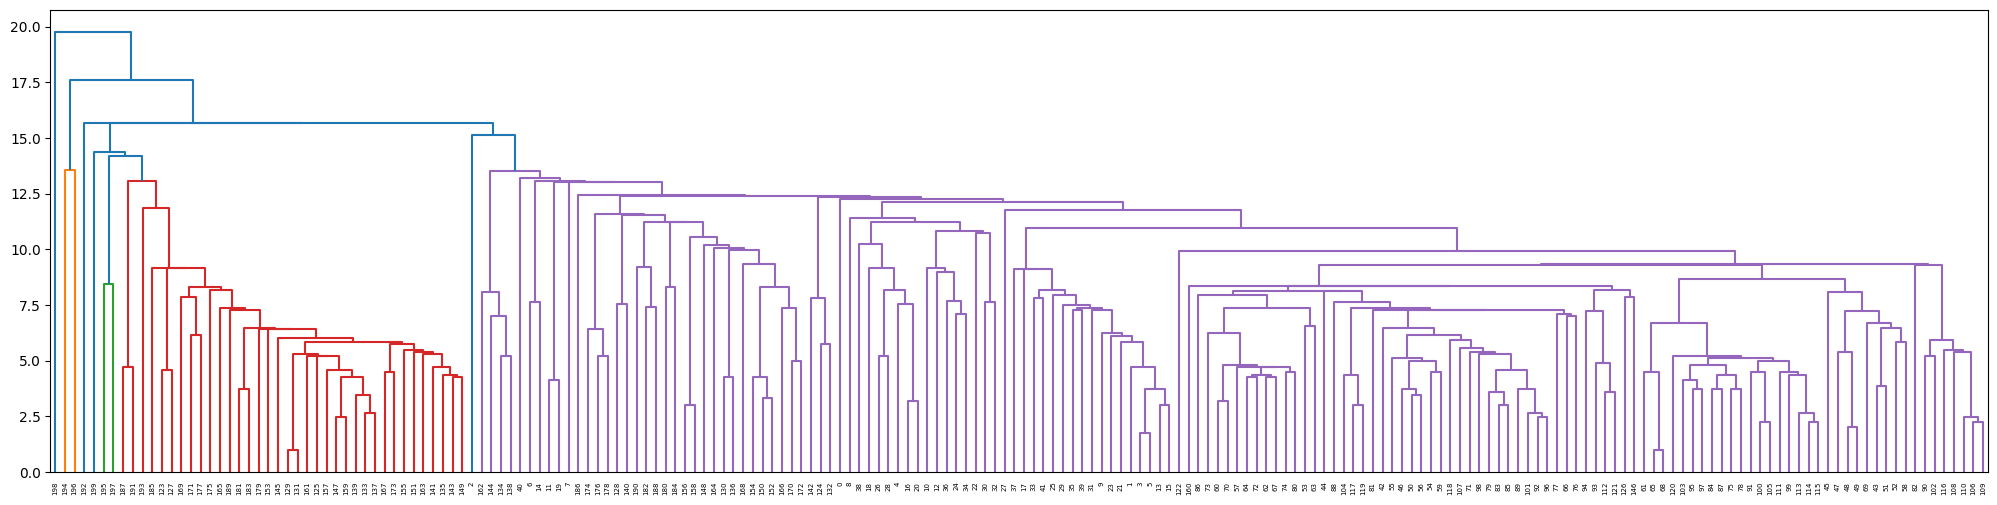

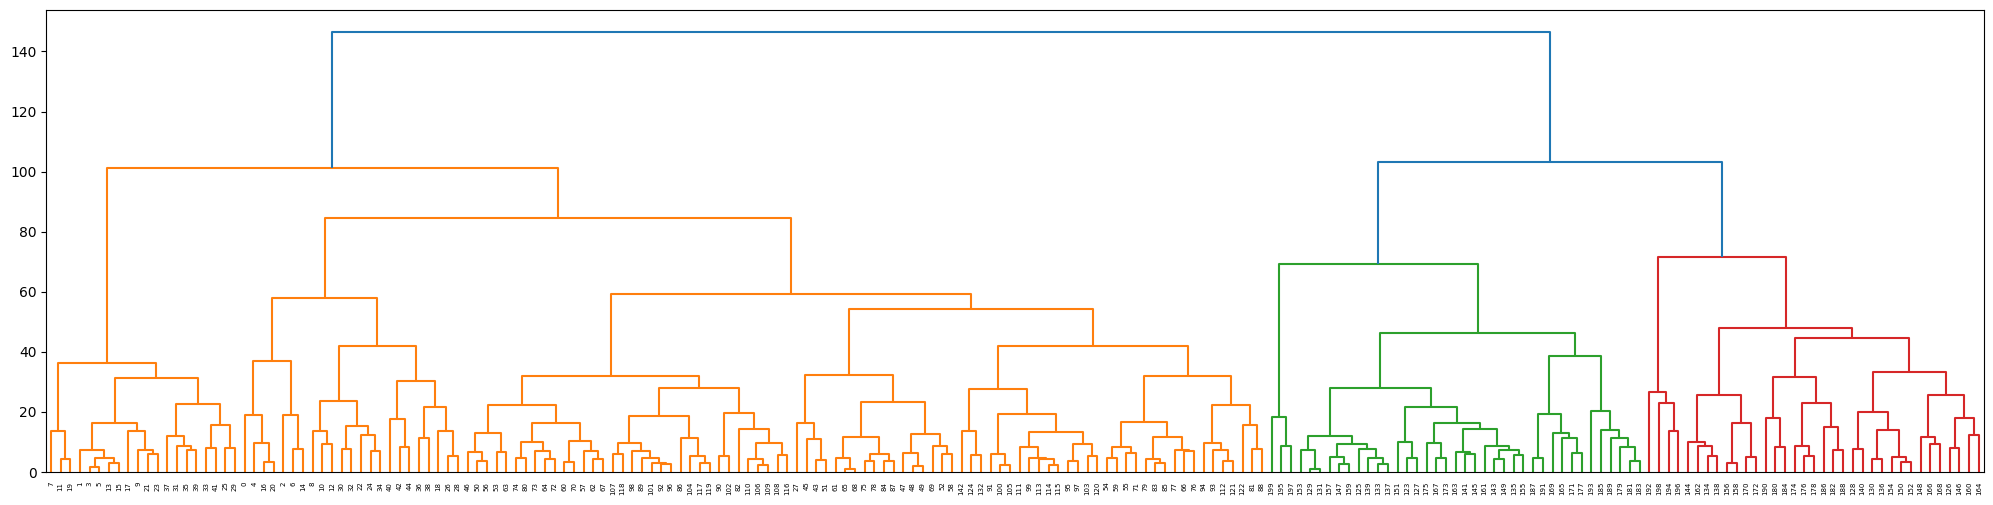

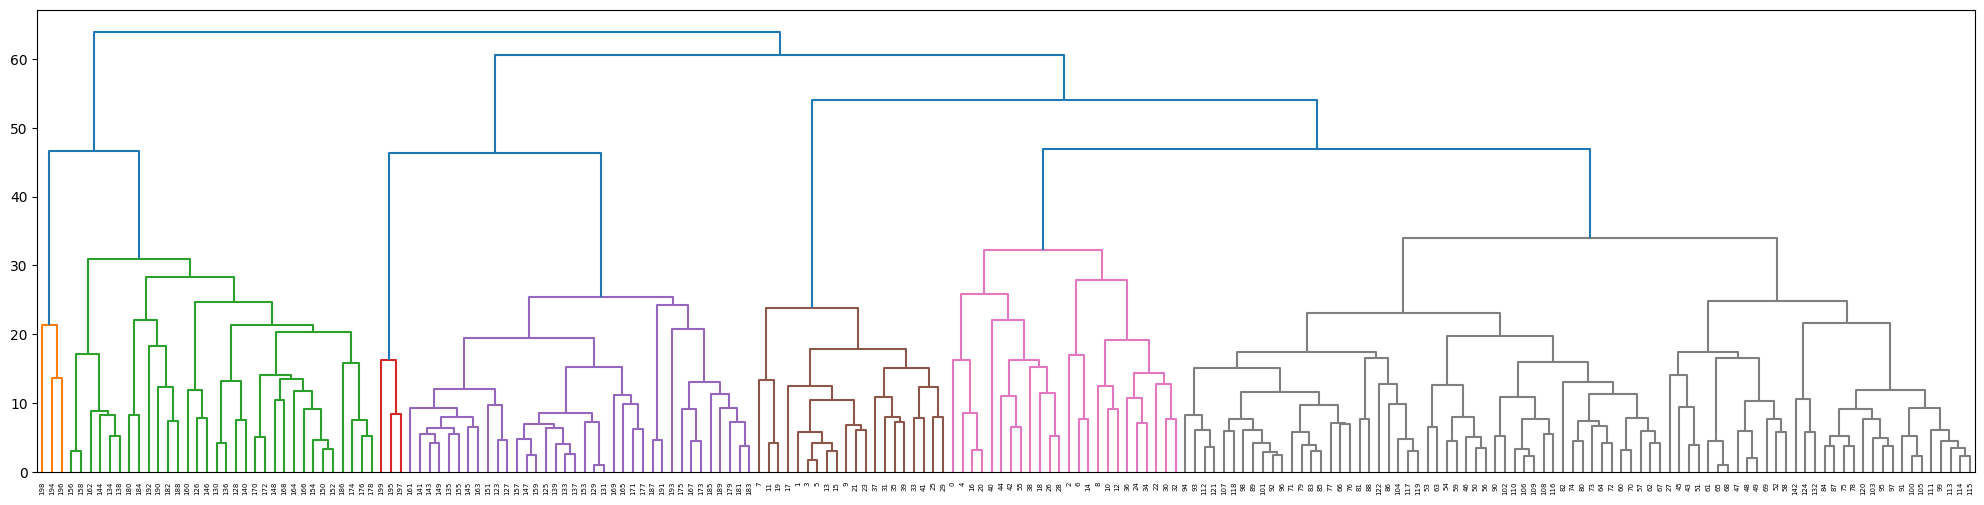

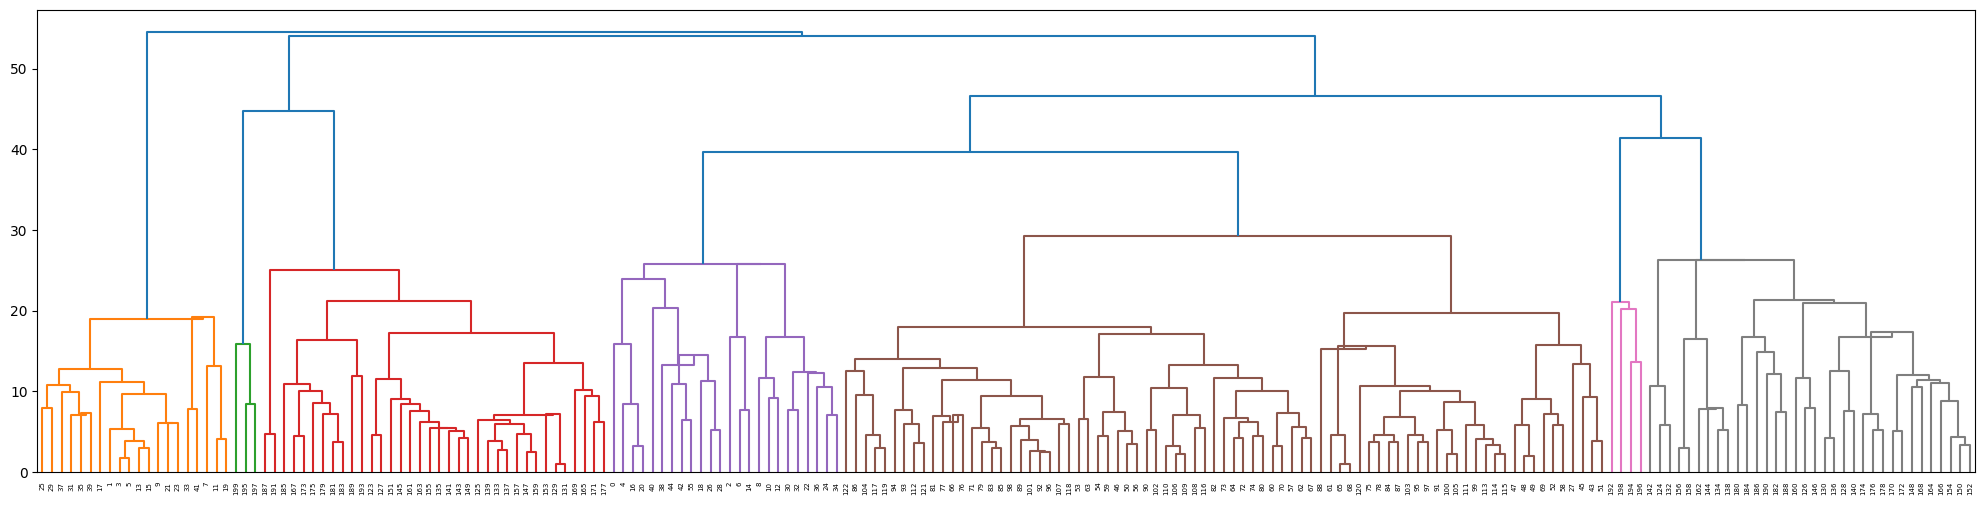

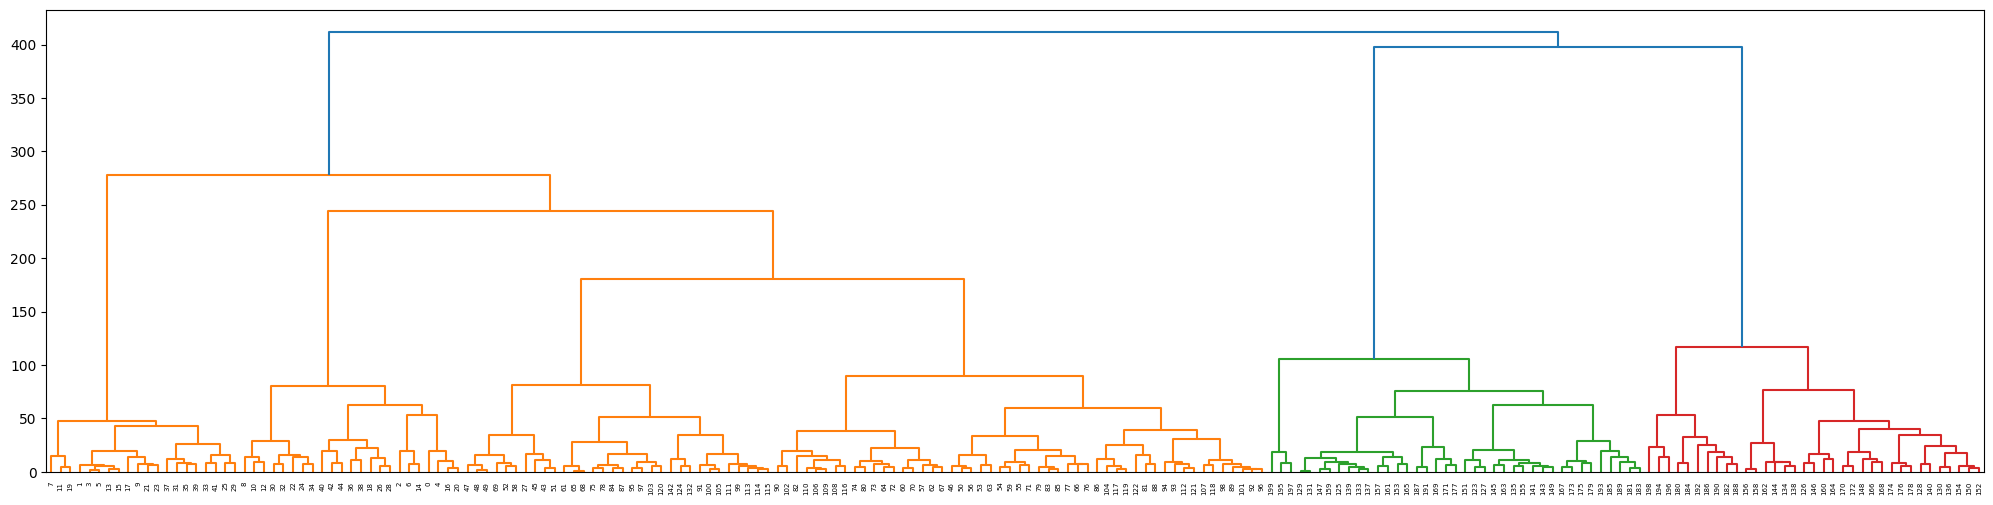

In [3]:
dataset = pd.read_csv('./SMAI-Dataset-hc-dataset/new_customers.csv')
# Remove the first column
dataset = dataset.iloc[:, 1:]
# Convert the data to numpy array
dataset = dataset.to_numpy()

# One Hot Encoding the first column
for row in dataset:
    if row[0] == 'Male':
        row[0] = 0
    else:
        row[0] = 1

# Remove some of the columns
dataset_mod = dataset.copy()
hc2 = HC(dataset_mod, 'single', 'euclidean')

# Types of linkage
Linkage_Vec = ['single', 'complete', 'average', 'centroid', 'ward']

# Iterate through, the Linkage Vec
for method in Linkage_Vec:
    hc = HC(dataset_mod, method, 'euclidean')
    linkage_new = hc.linkage()
    hc.dendrogram(linkage_new)


## Taking a Sub-Set of Features

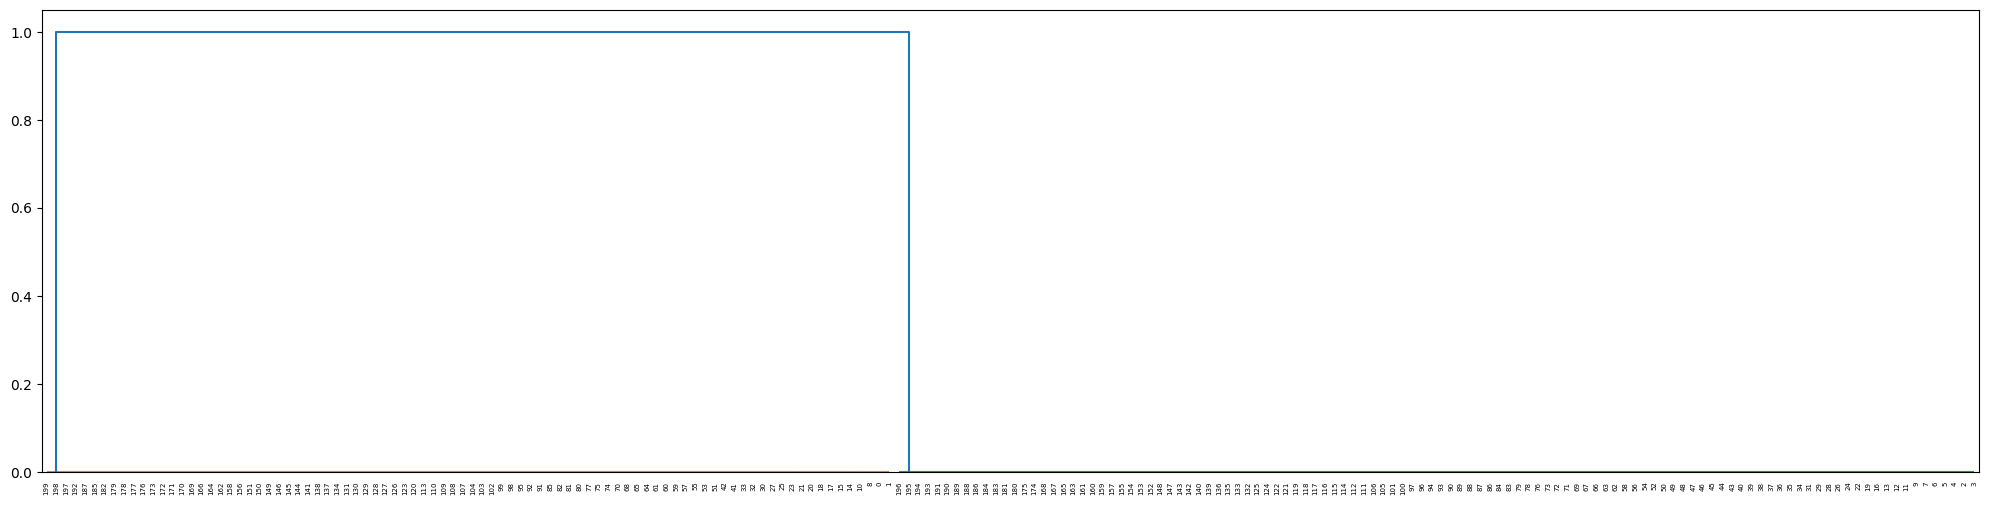

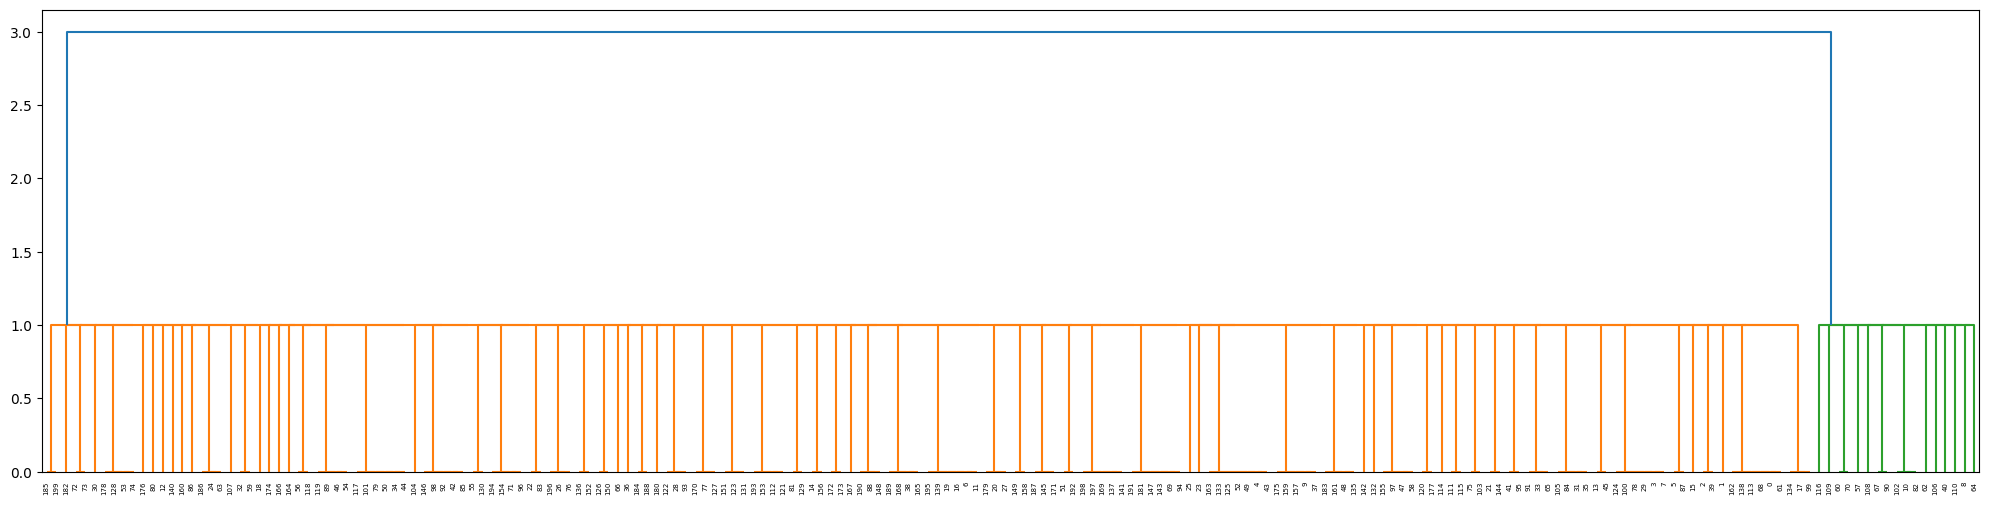

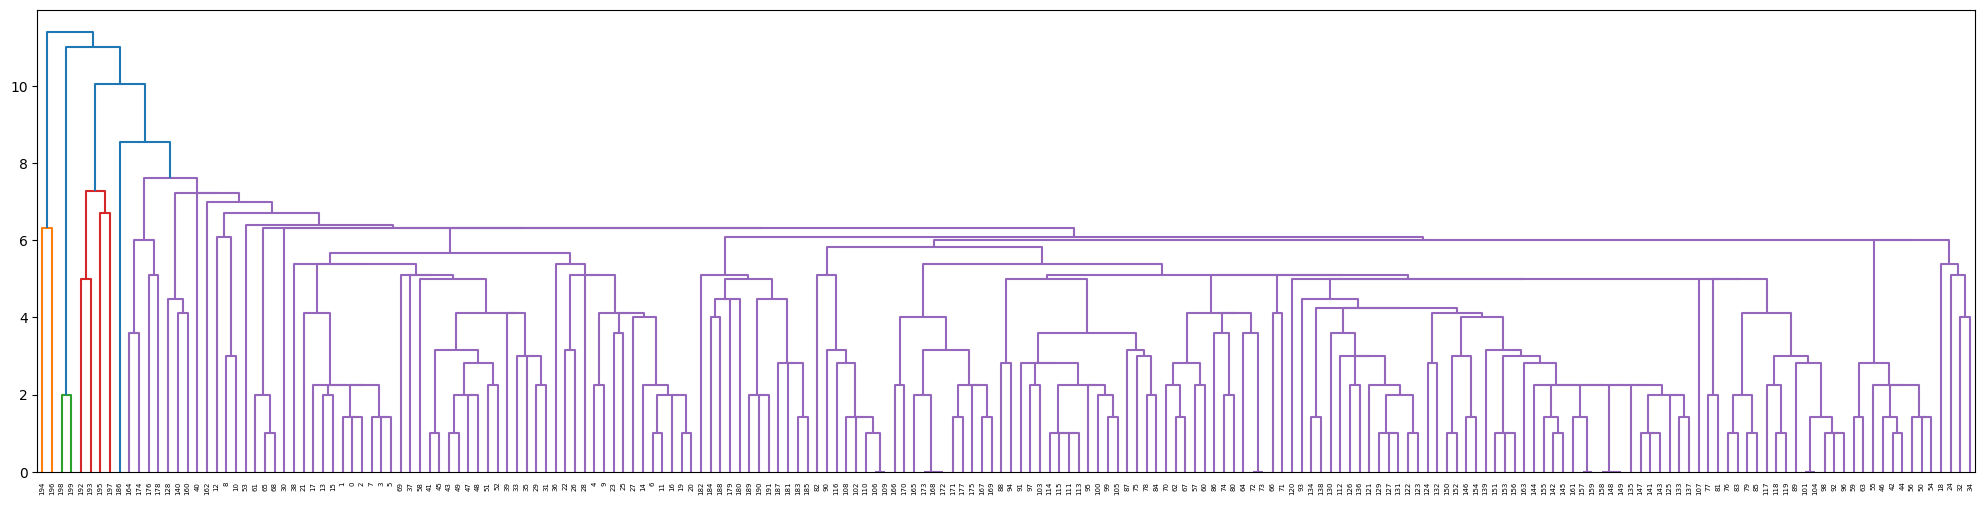

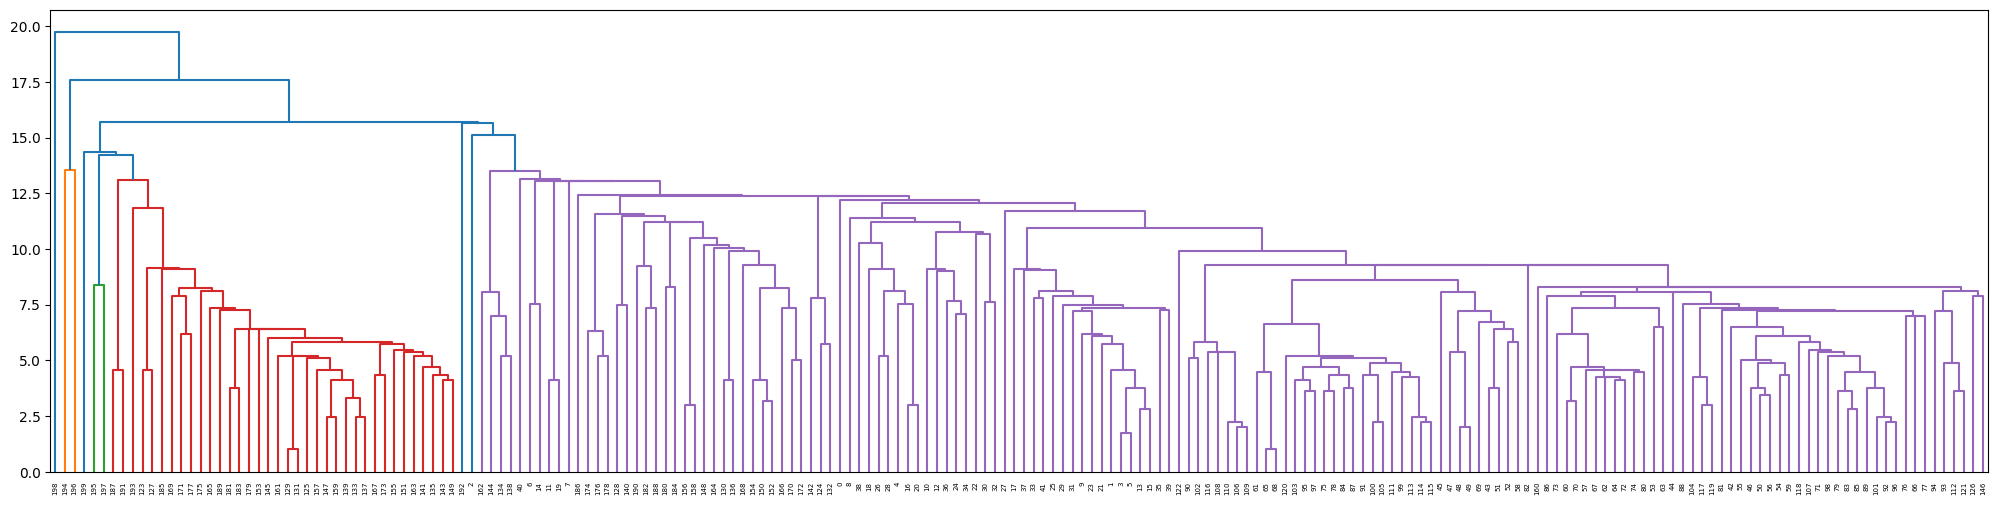

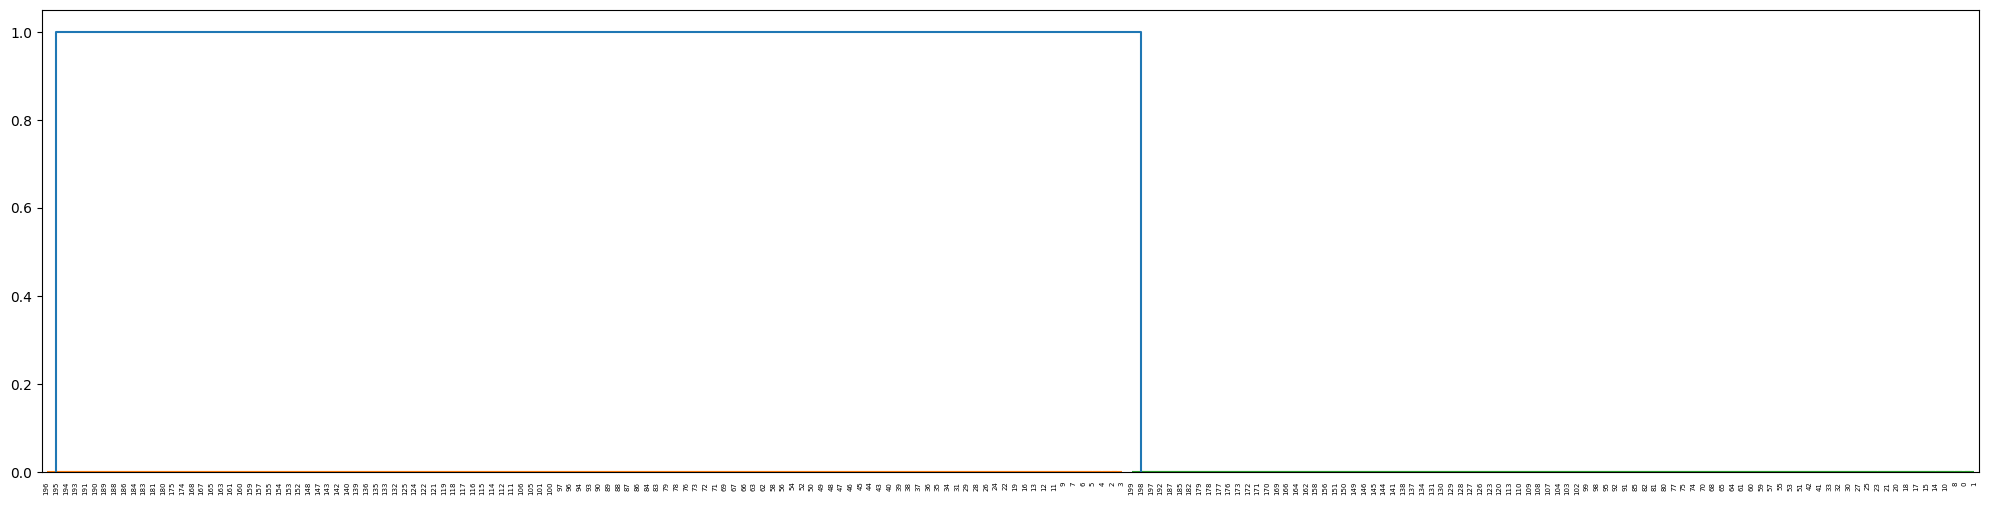

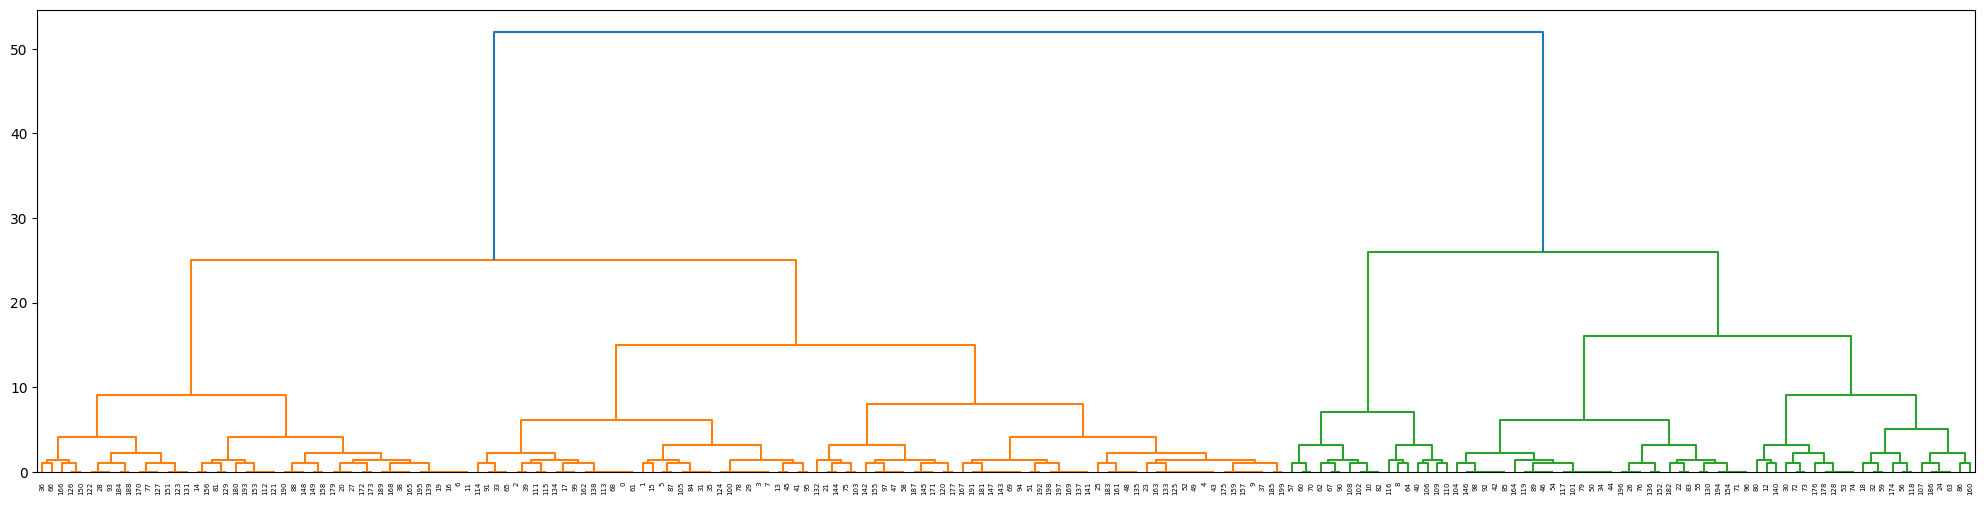

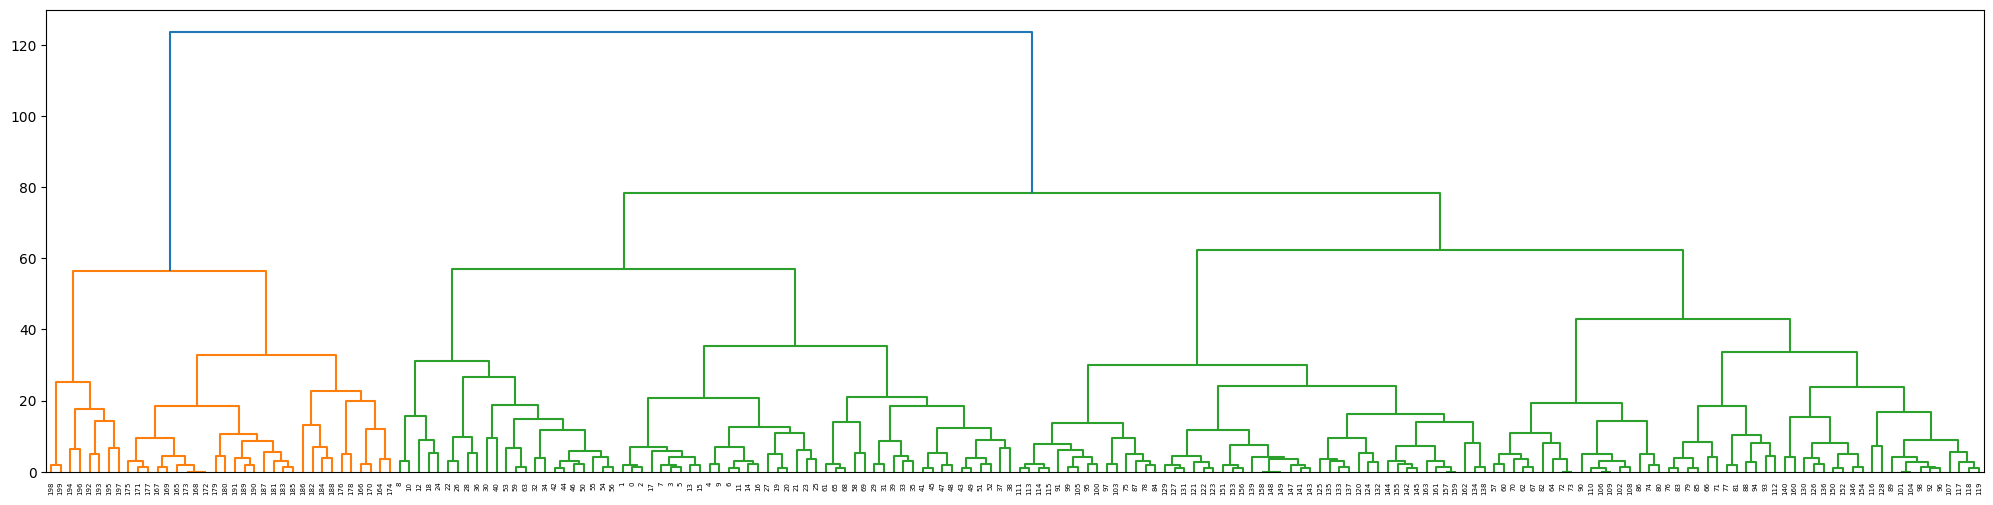

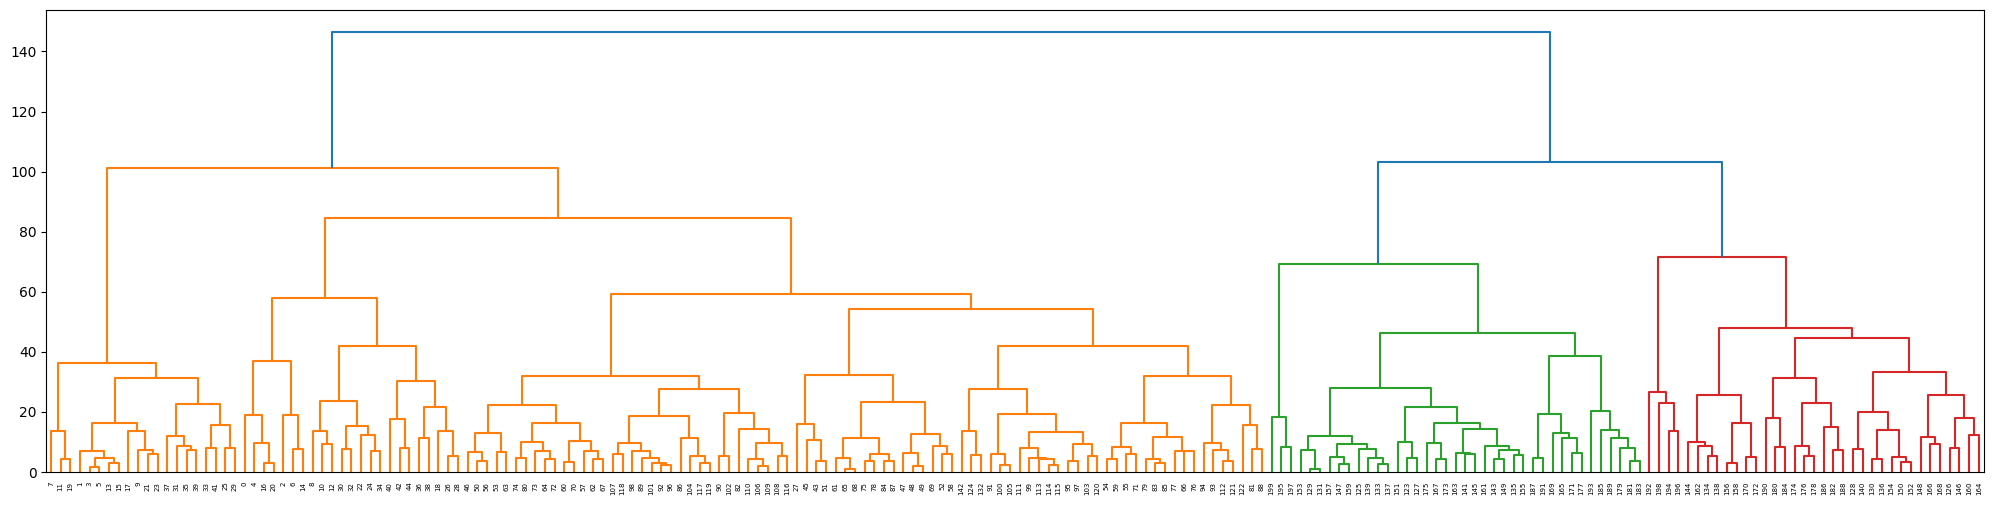

In [4]:
dataset_mod_array = [dataset[:, :1], dataset[:, :2], dataset[:, 1:3], dataset[:, 1:4]]

Linkage_Vec = ['single', 'complete']

# Iterate through, the Linkage Vec
for method in Linkage_Vec:
    for data in dataset_mod_array:
        hc = HC(data, method, 'euclidean')
        linkage_new = hc.linkage()
        hc.dendrogram(linkage_new)

## Problem 3.2

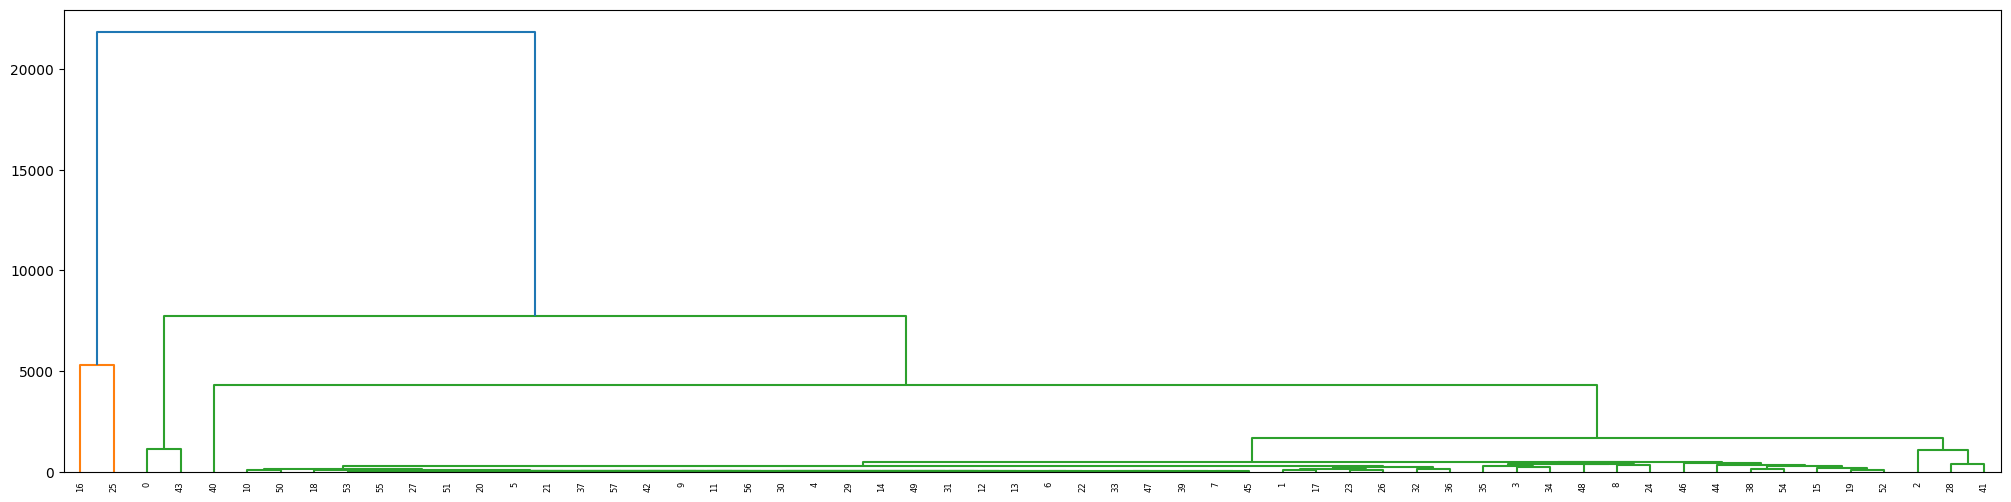

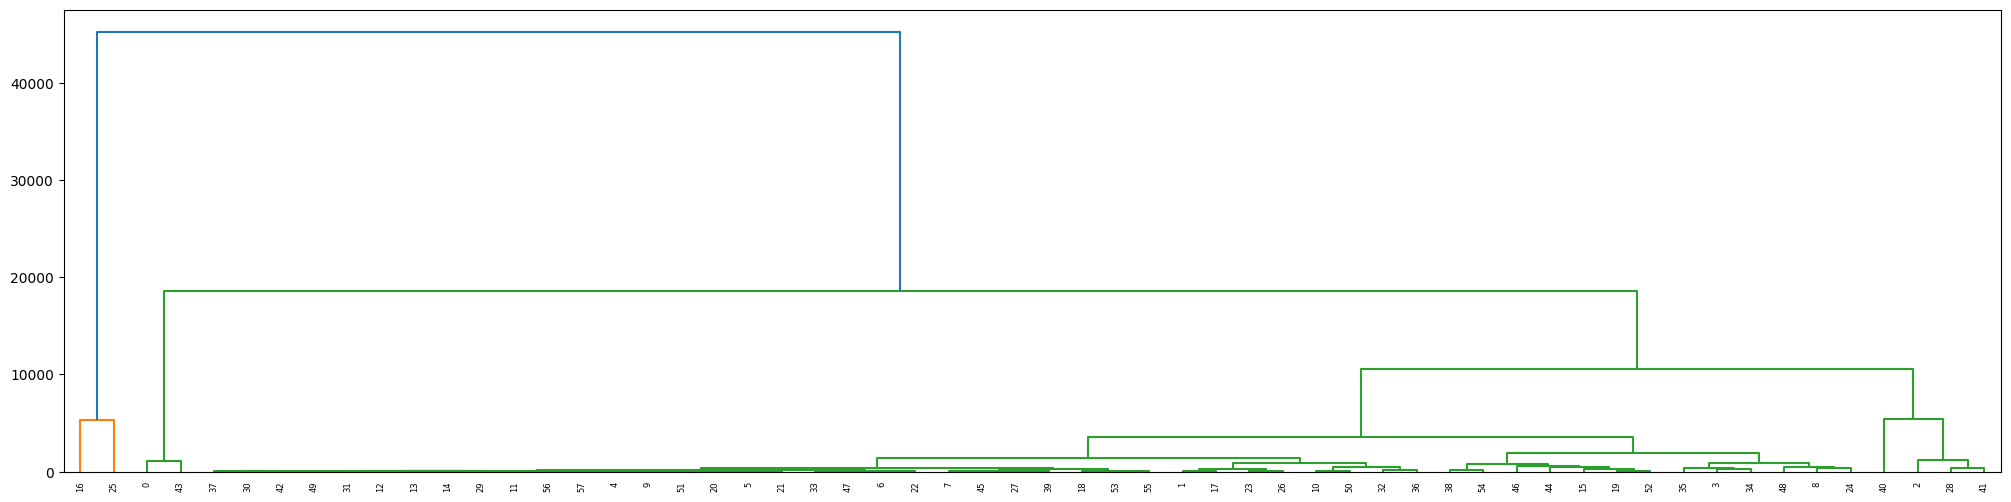

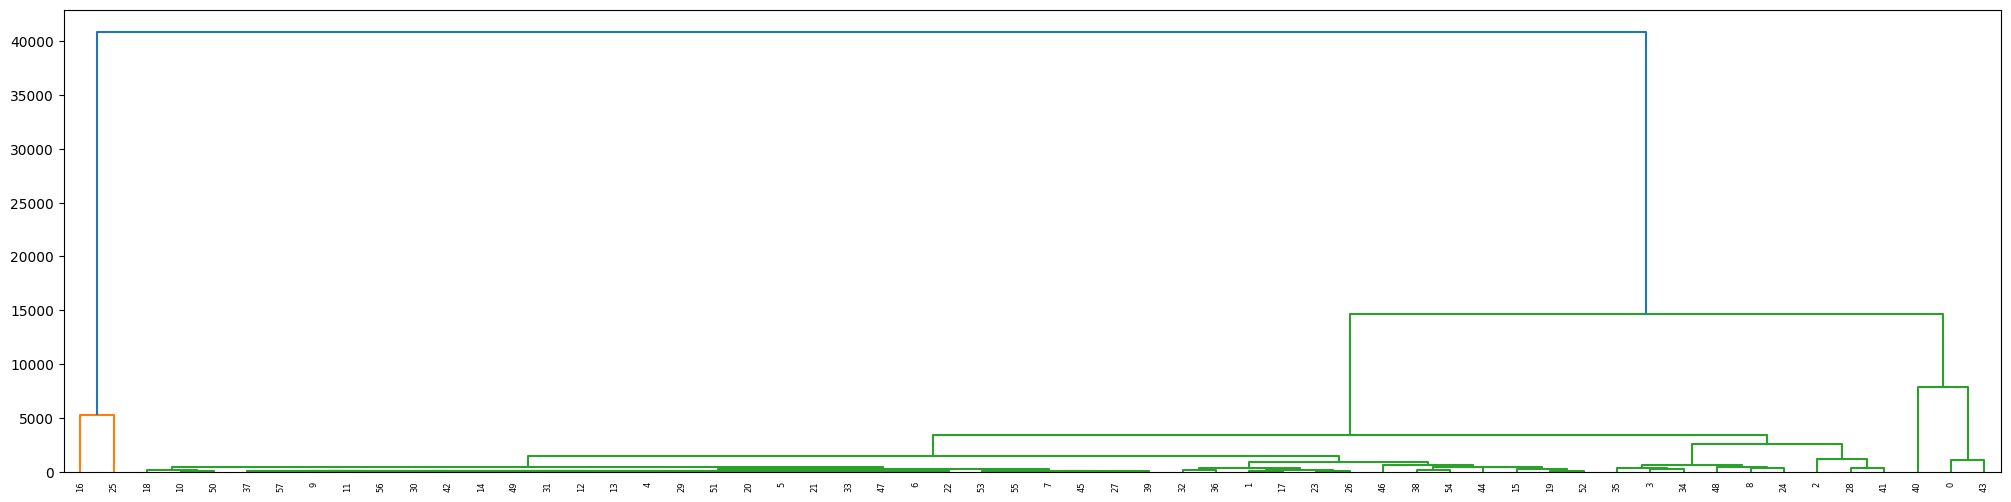

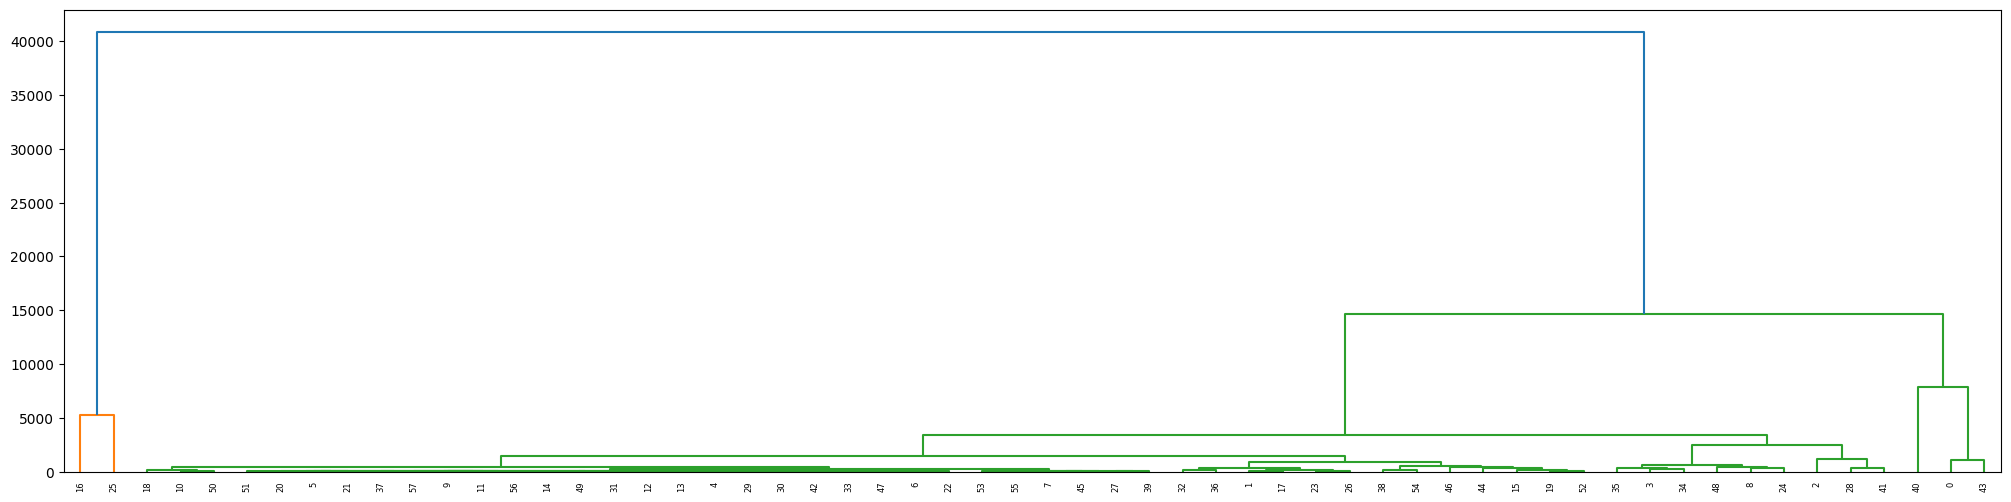

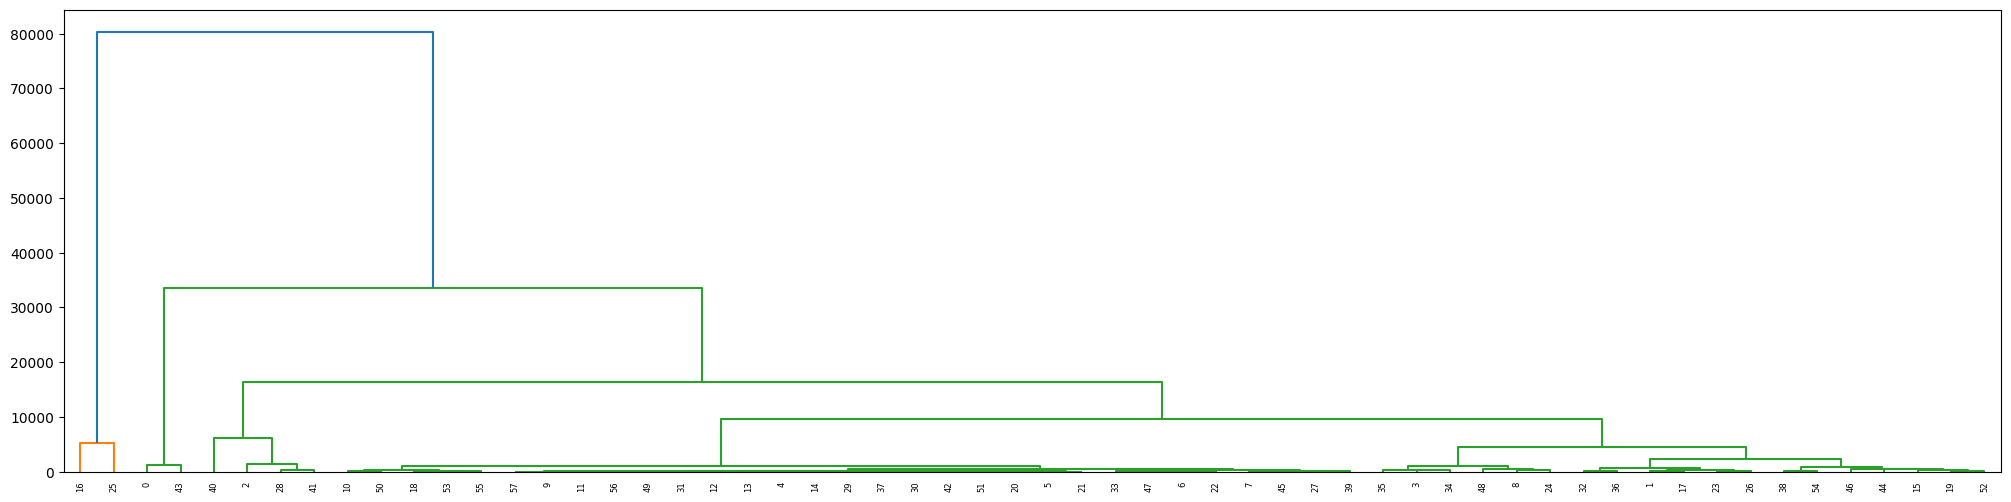

In [8]:
# Read the dataset
dataset = pd.read_csv('./SMAI-Dataset-gene-expression/gene.csv')
# Remove the first column
dataset = dataset.iloc[:, 1:]
# Convert the data to numpy array
dataset = dataset.to_numpy()

# Types of linkage
Linkage_Vec = ['single', 'complete', 'average', 'centroid', 'ward']

# Iterate through, the Linkage Vec
for method in Linkage_Vec:
    hc = HC(dataset, method, 'euclidean')
    linkage_new = hc.linkage()
    hc.dendrogram(linkage_new)



/opt/homebrew/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:2844: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


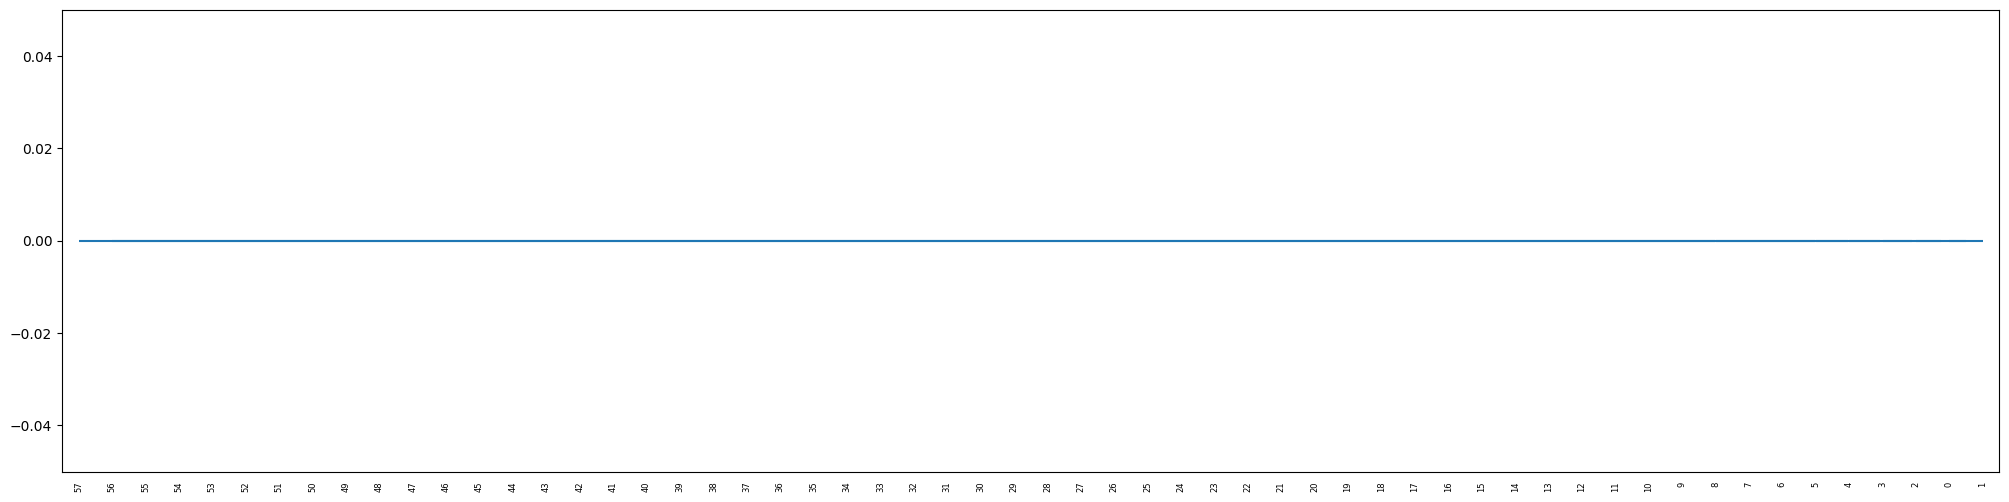

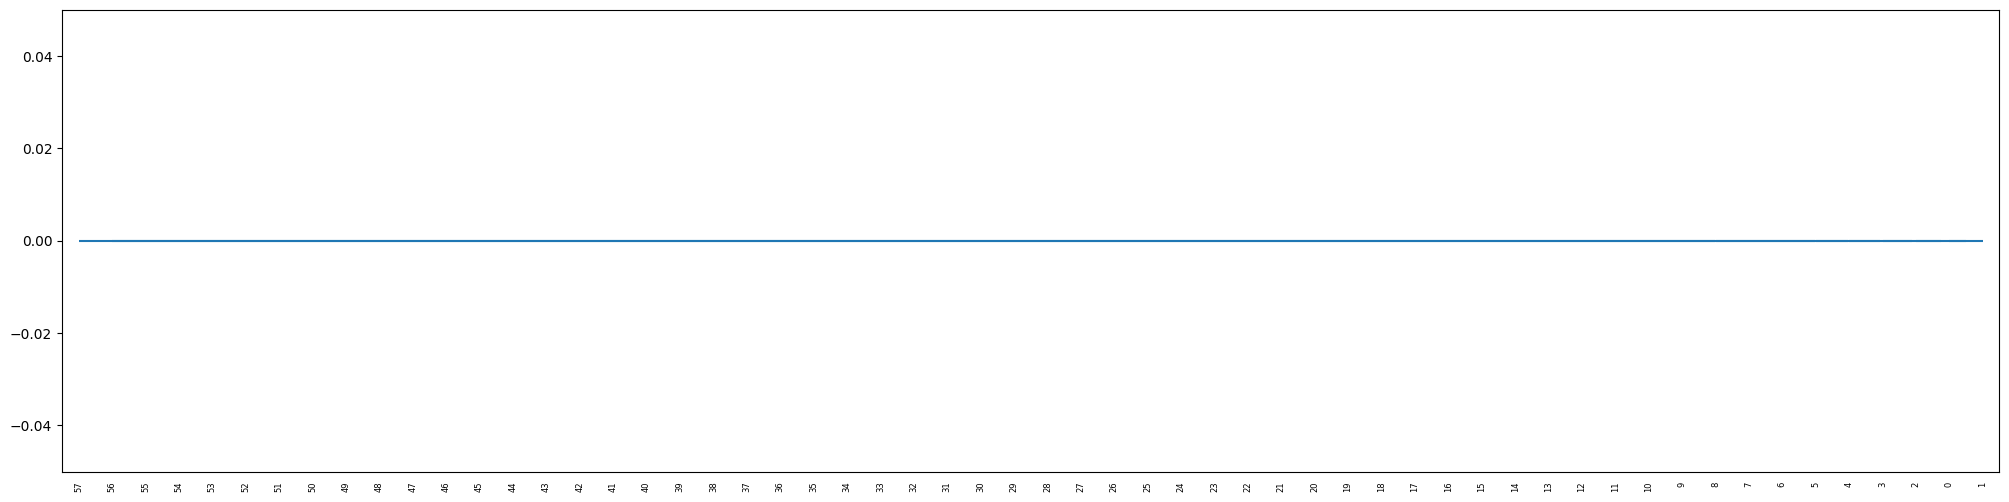

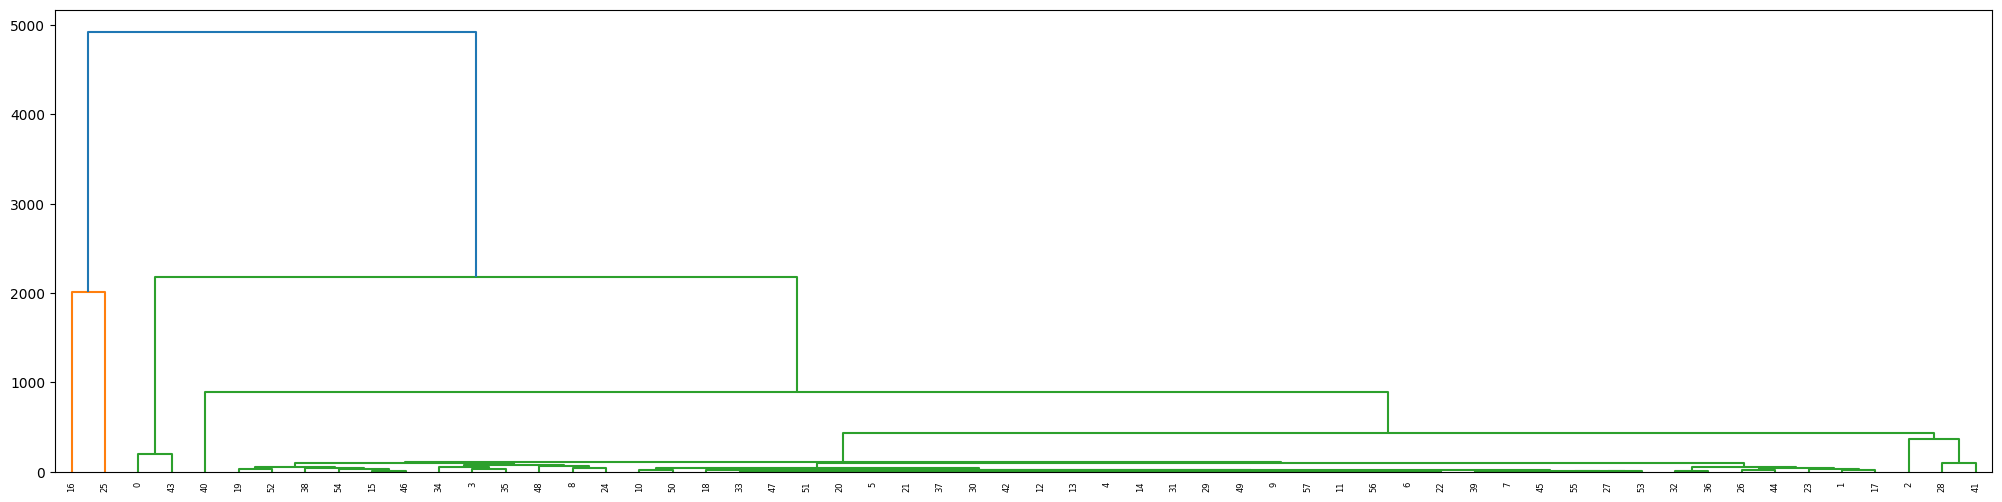

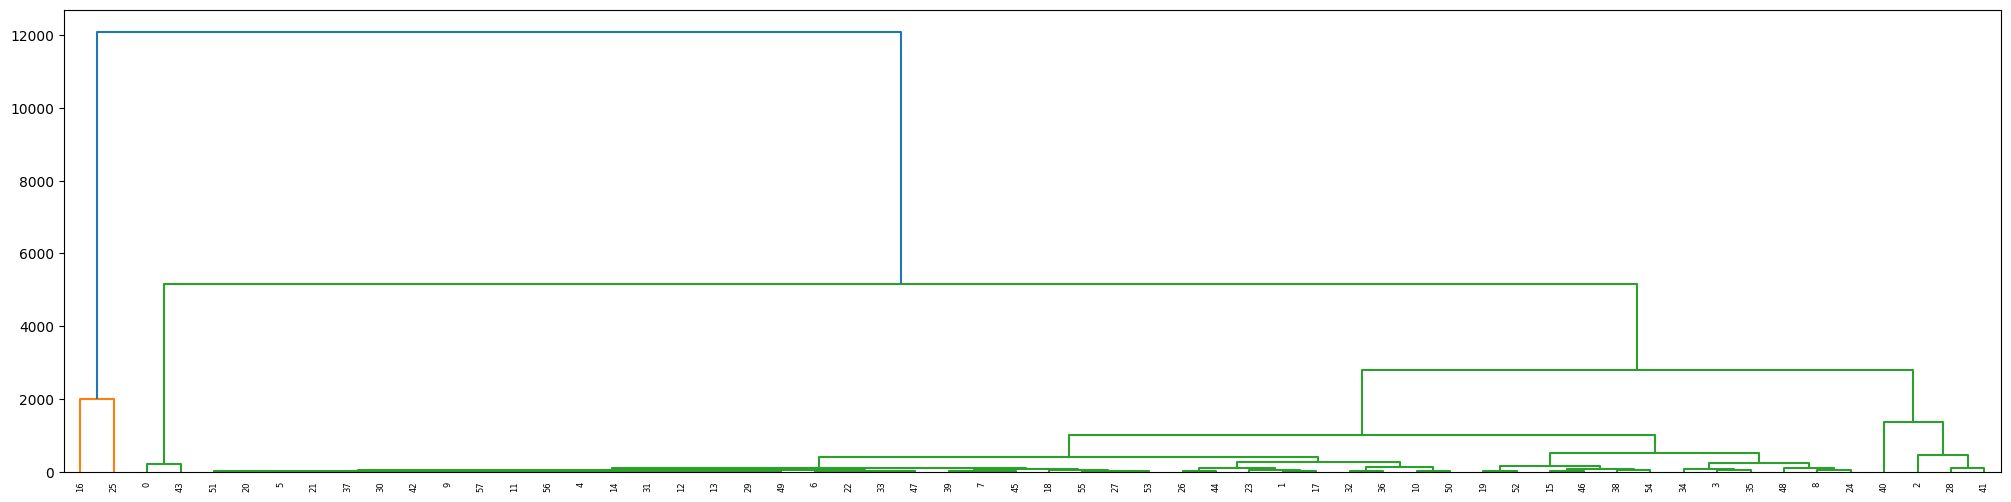

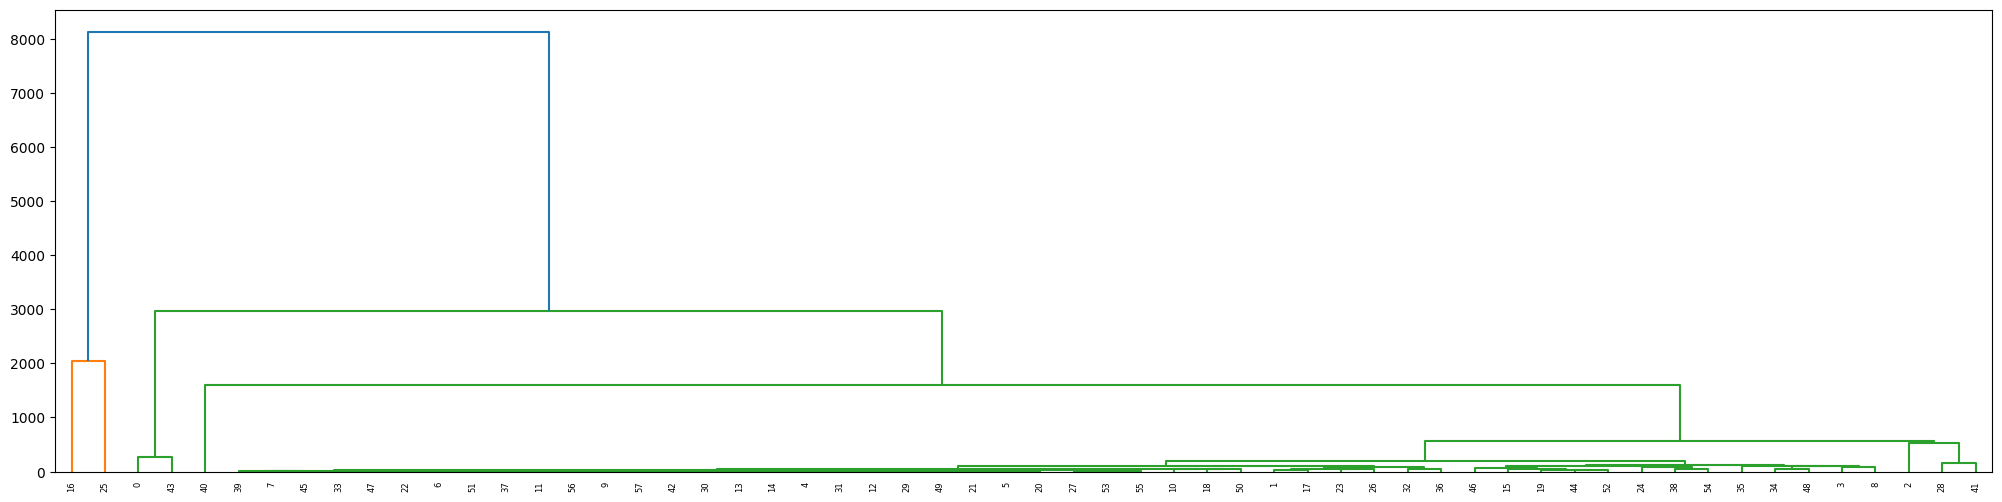

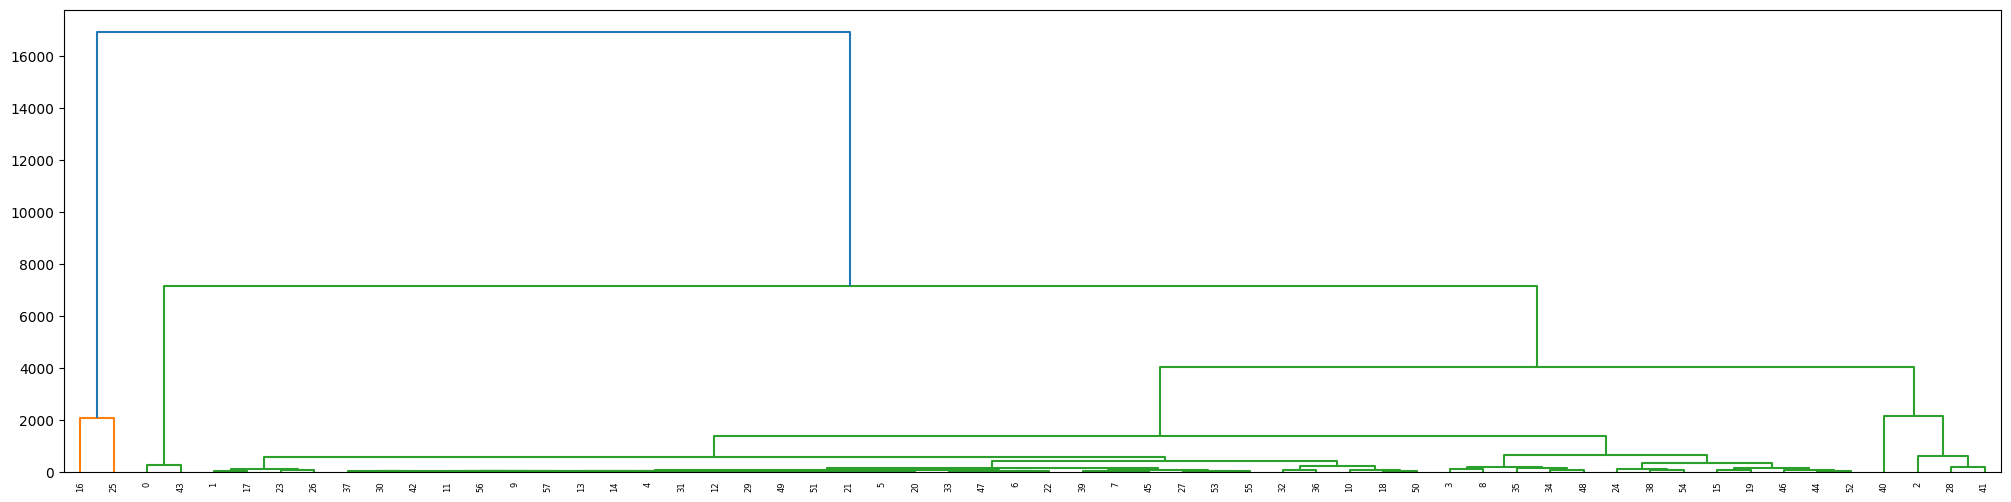

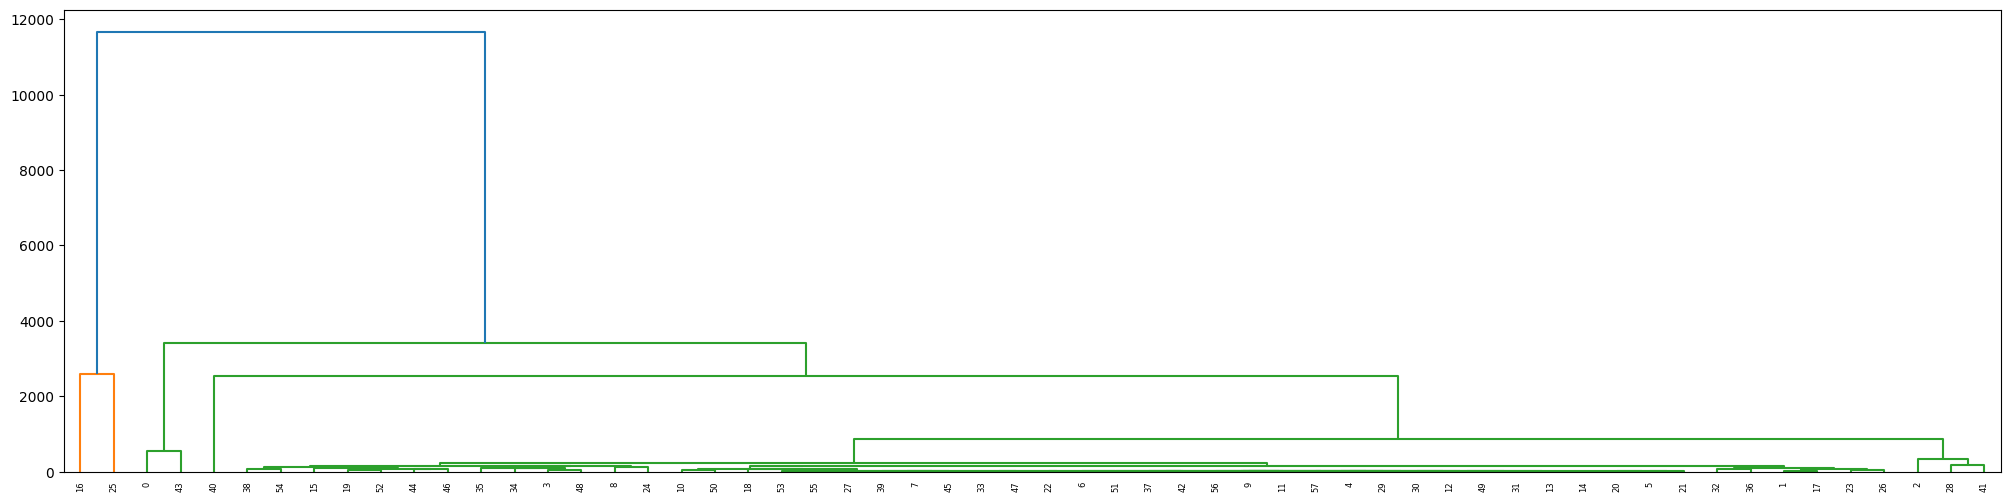

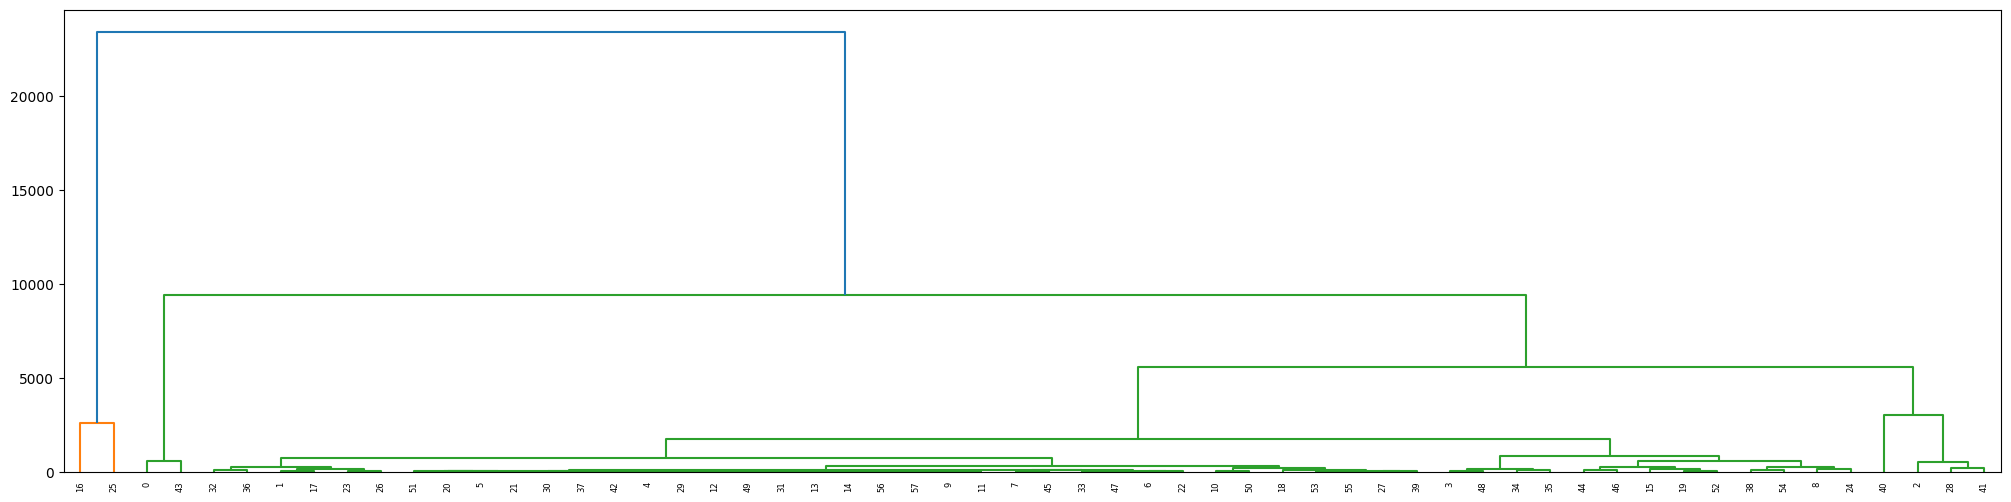

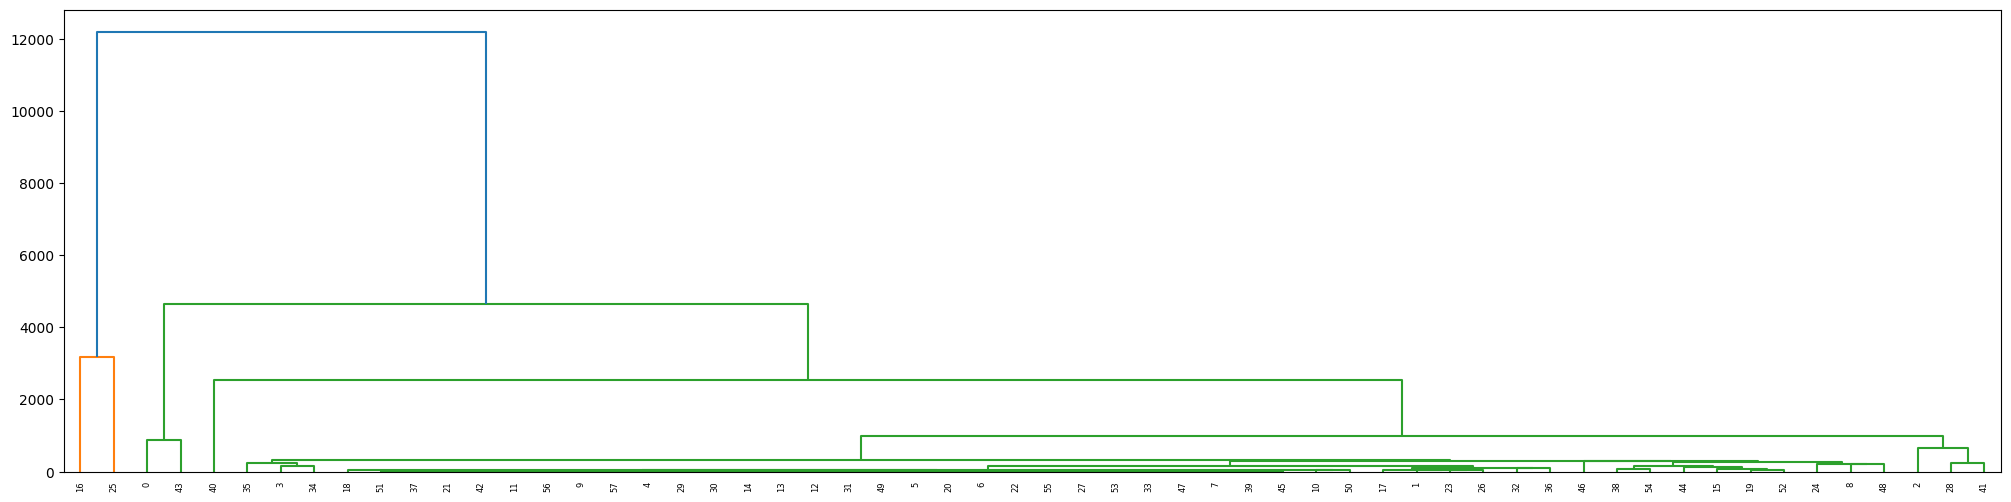

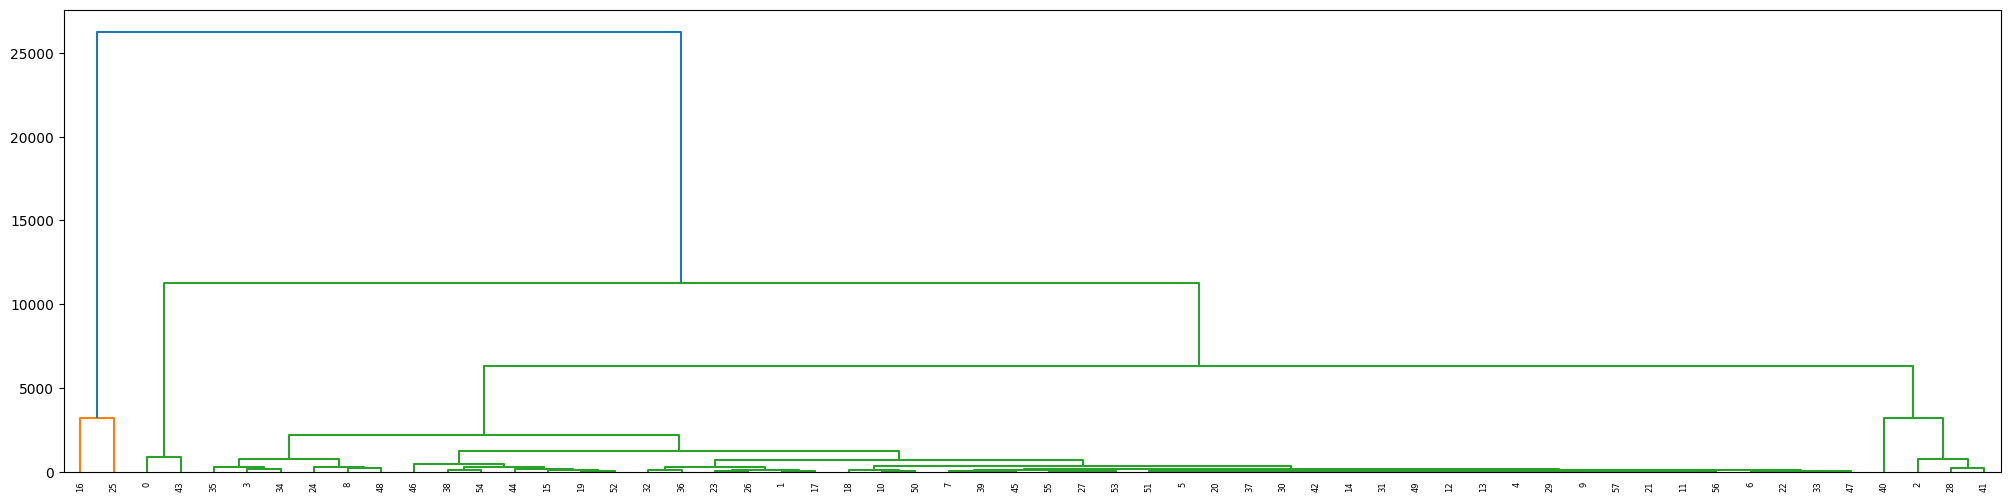

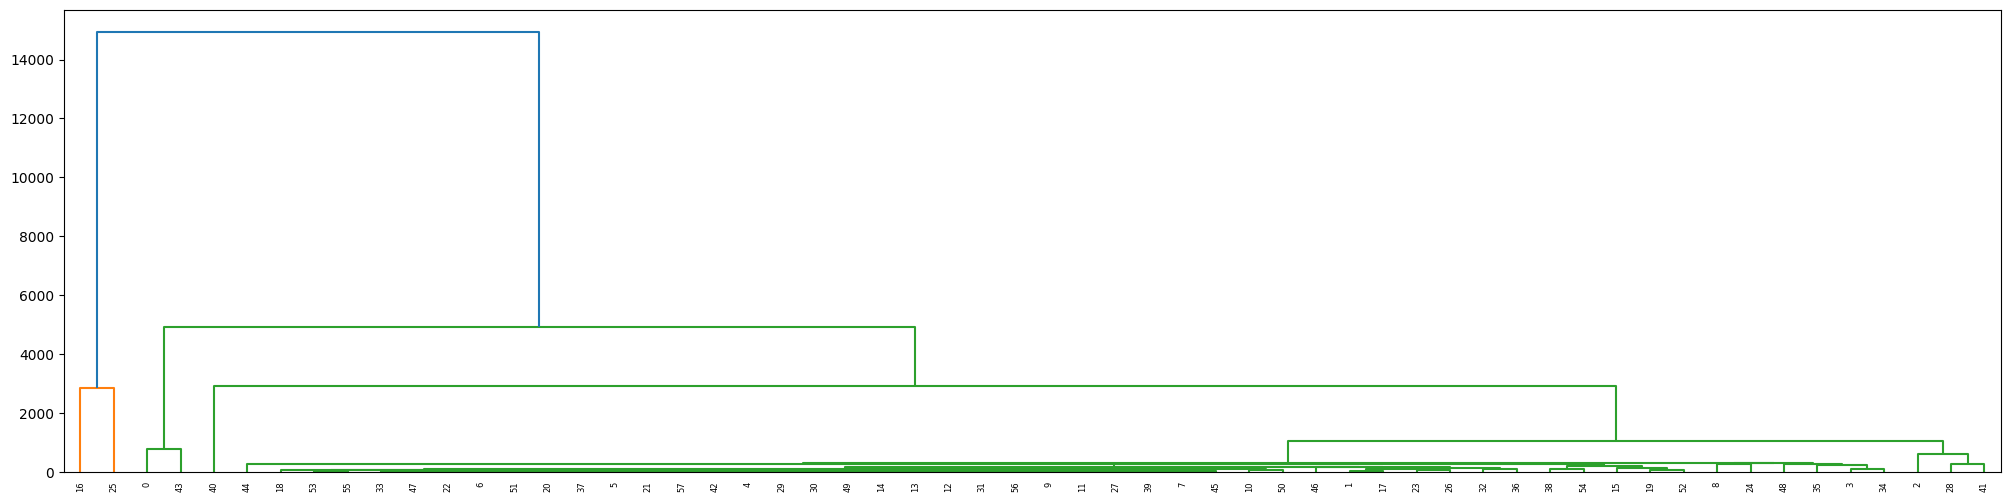

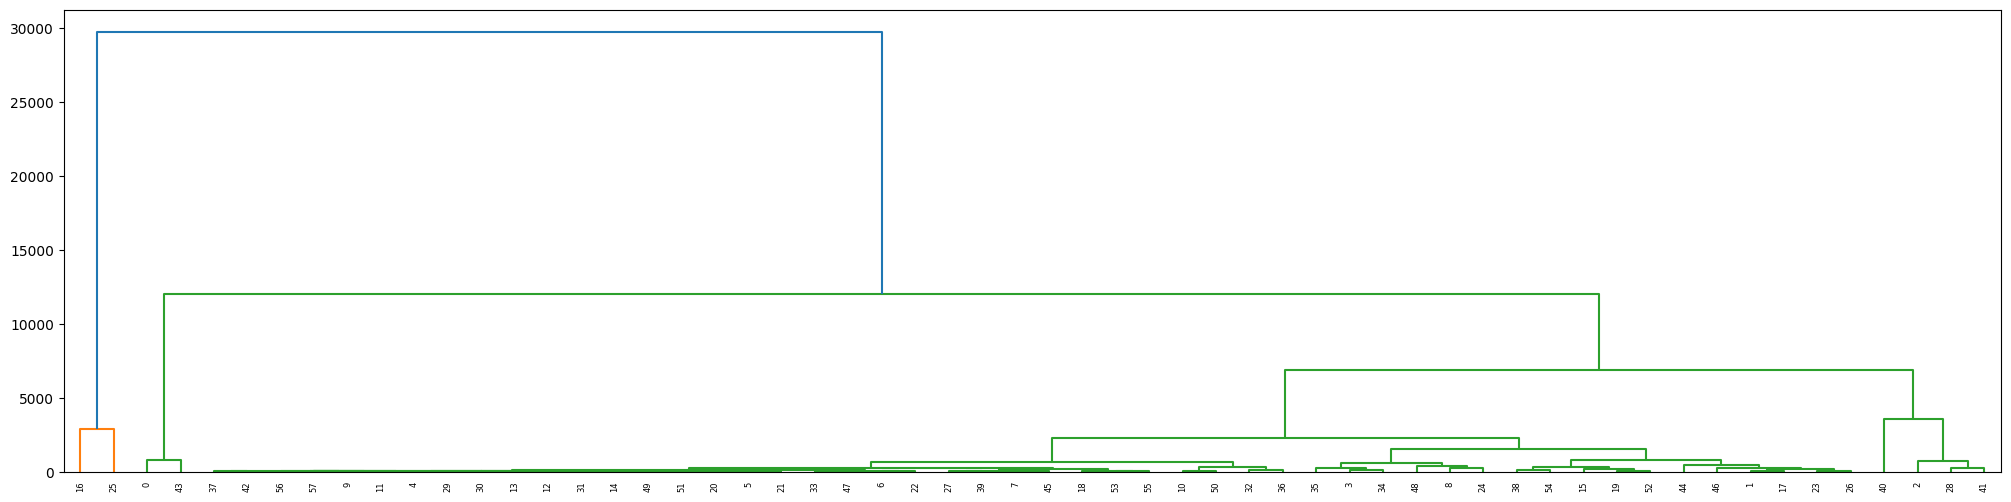

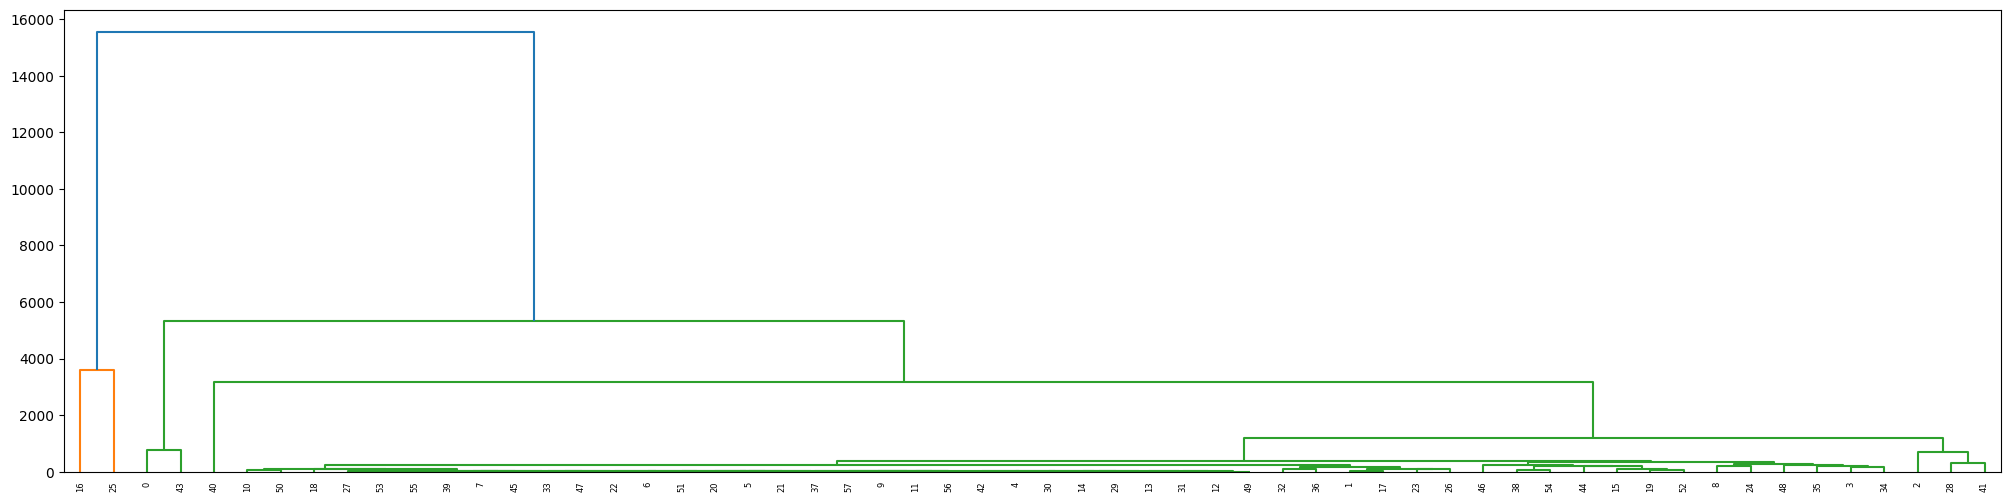

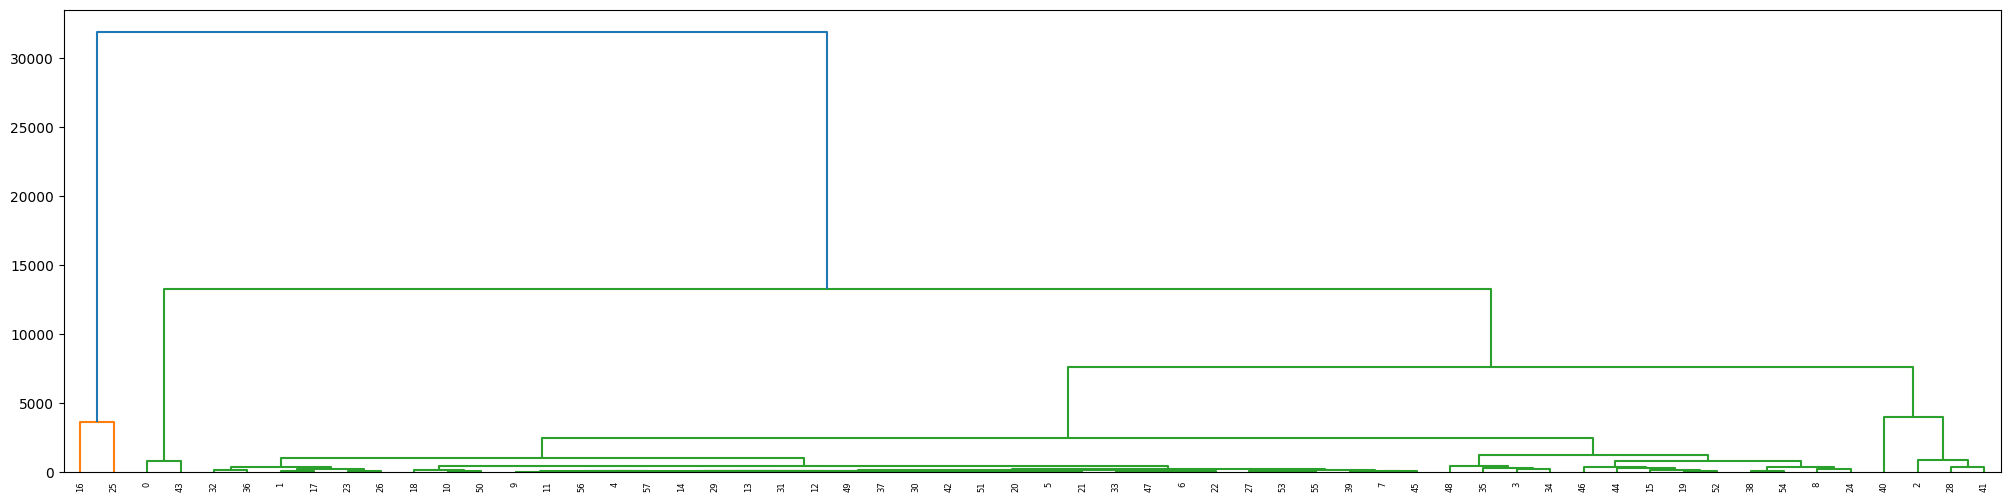

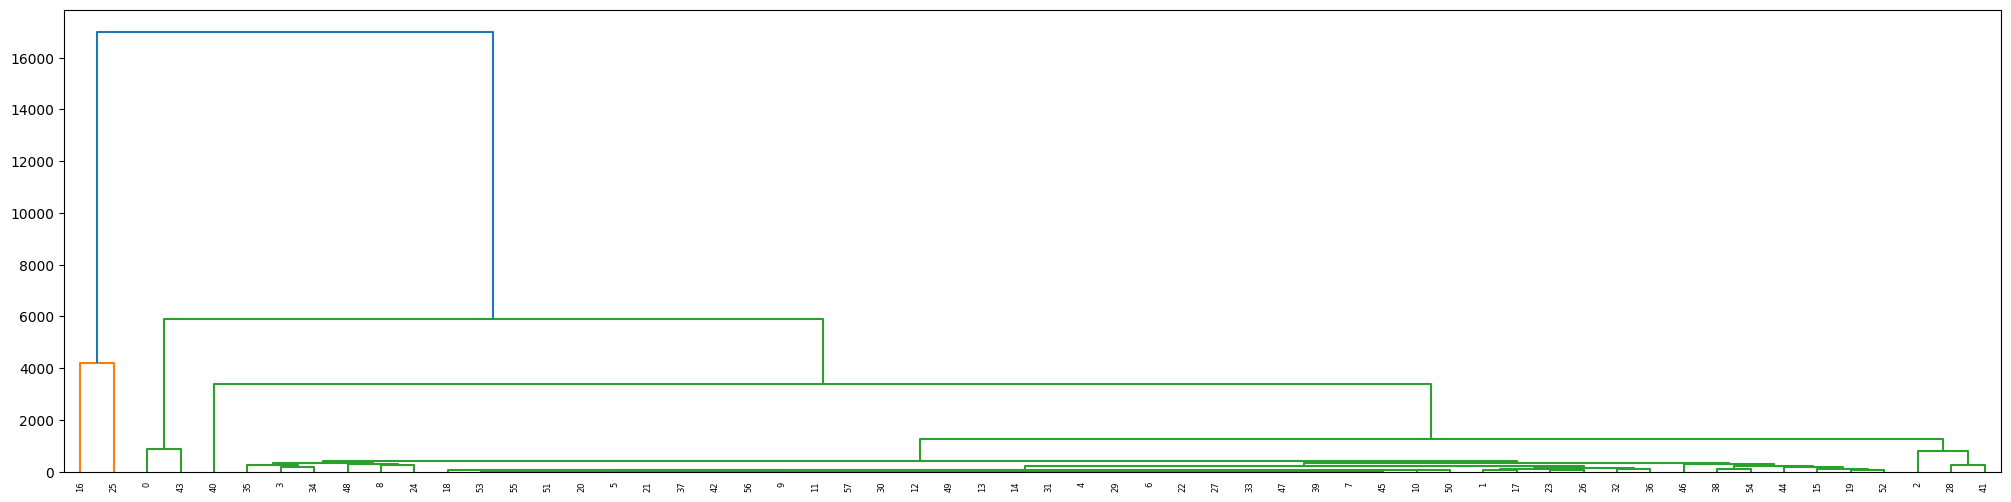

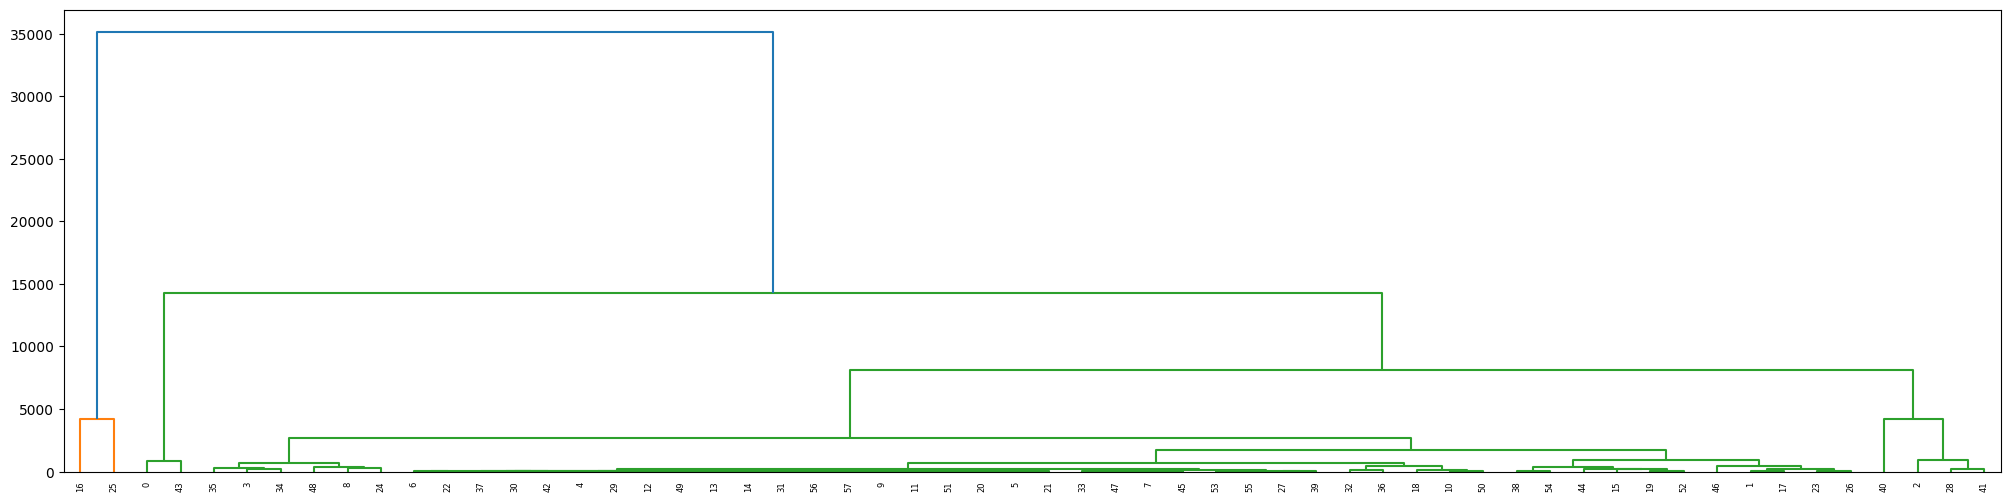

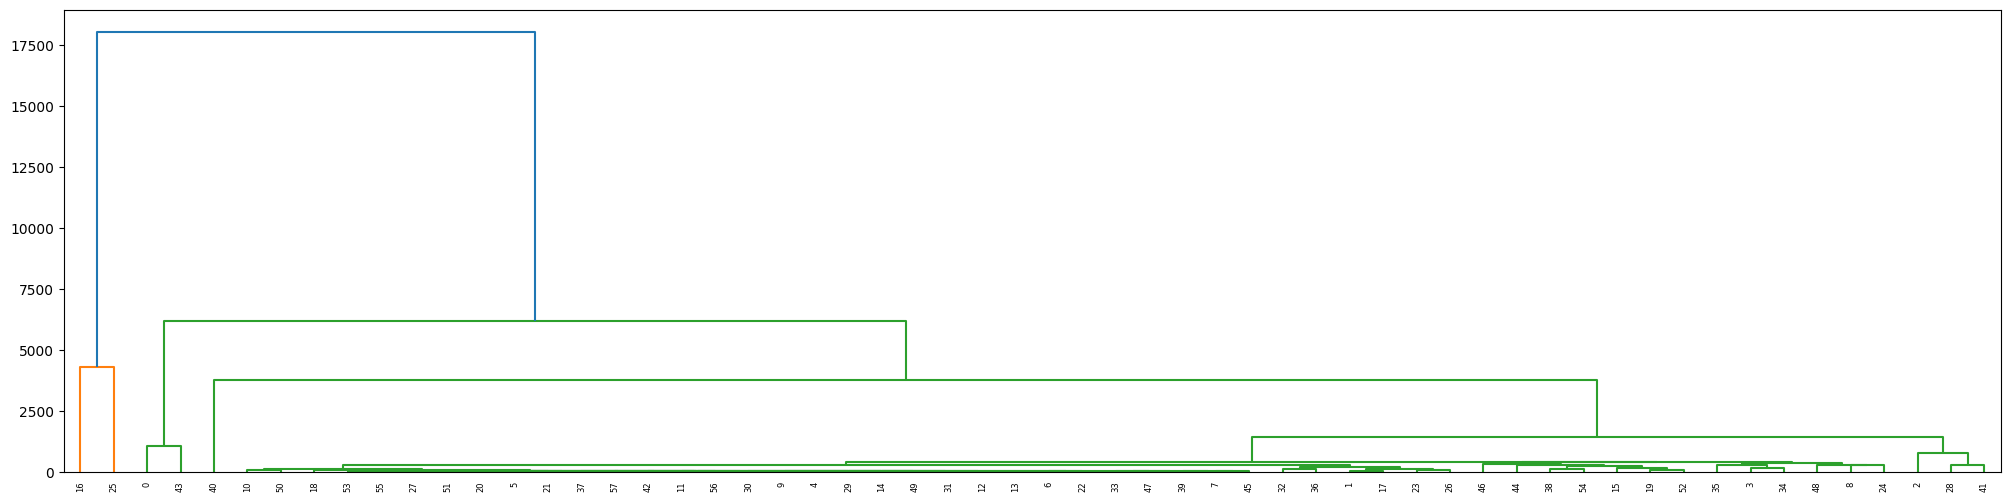

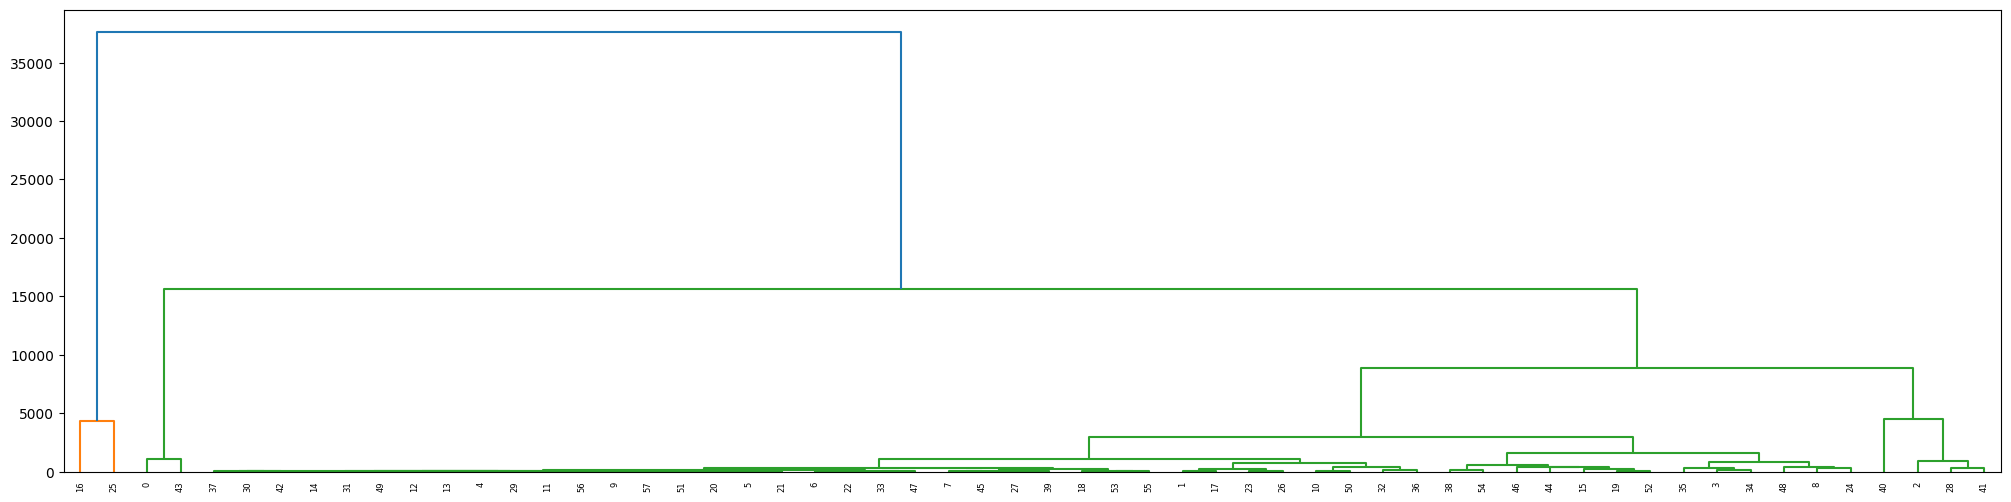

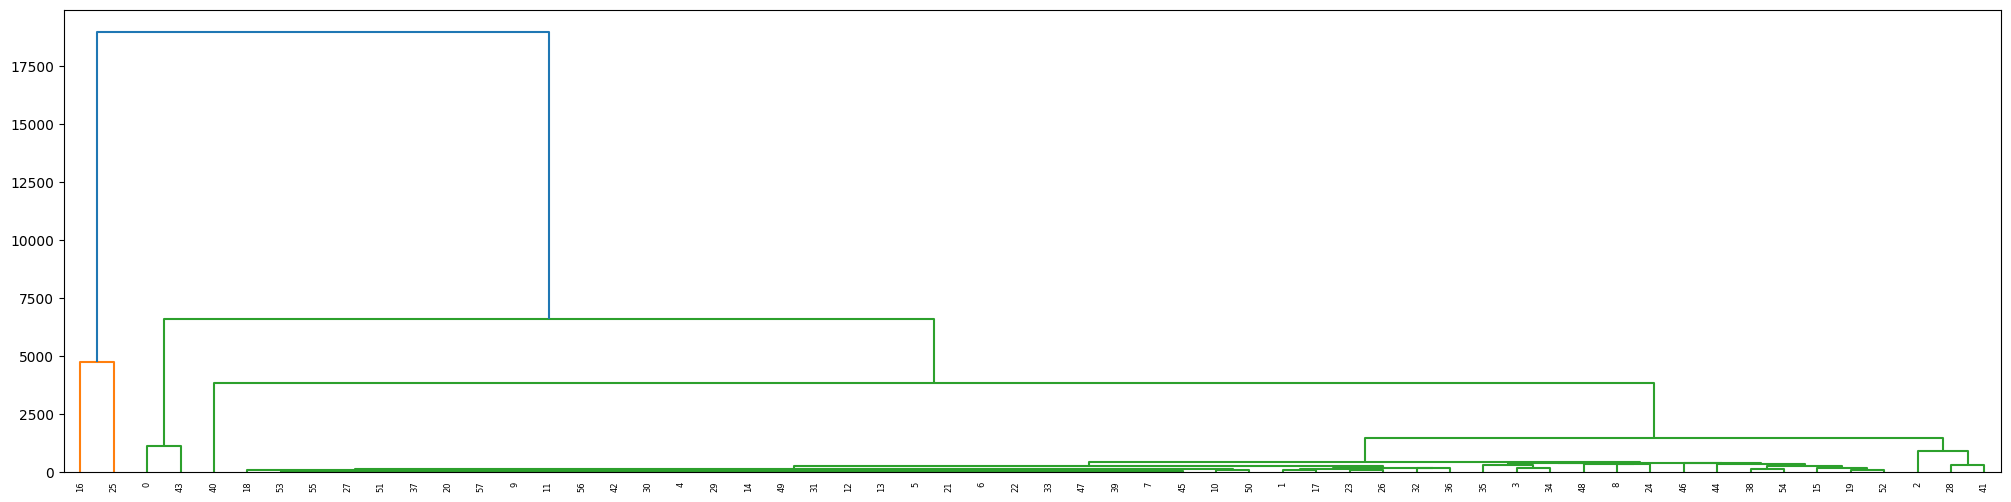

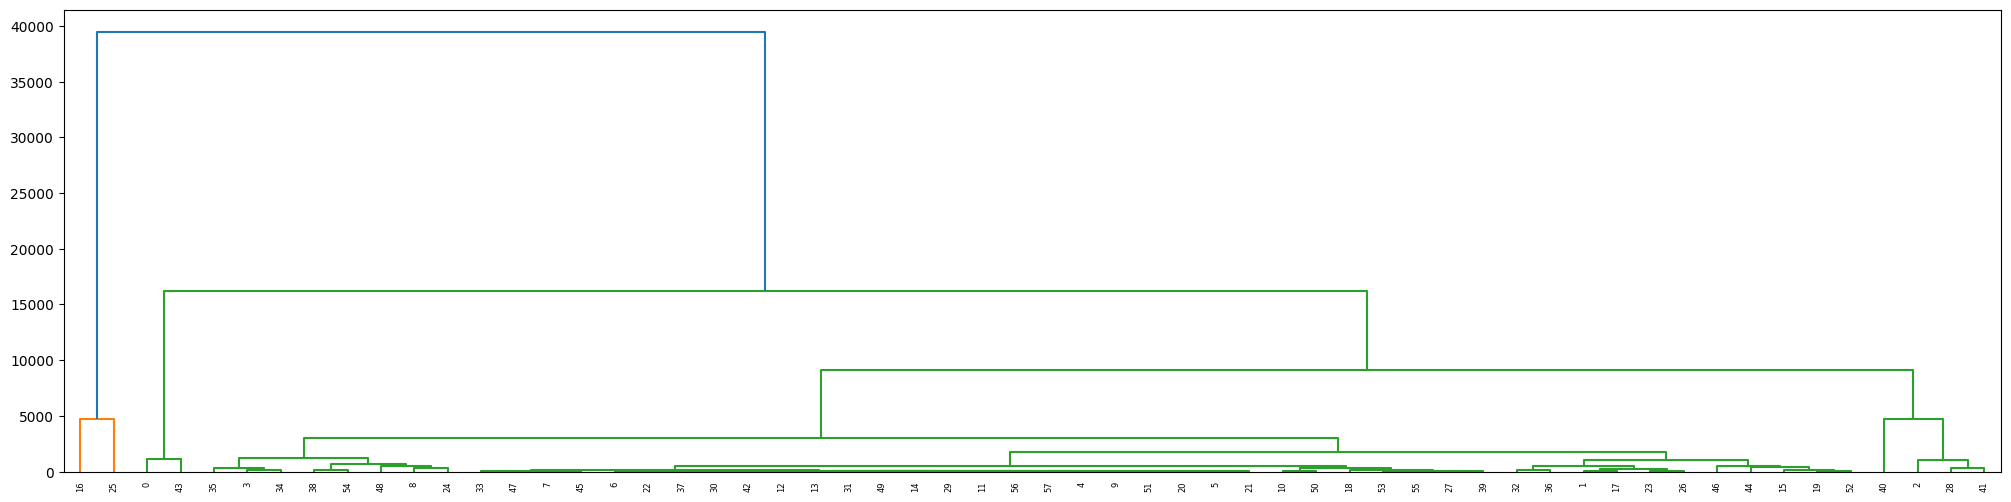

In [6]:
# Read the dataset
dataset = pd.read_csv('./SMAI-Dataset-gene-expression/gene.csv')
# Remove the first column
dataset = dataset.iloc[:, 1:]
# Convert the data to numpy array
dataset = dataset.to_numpy()

# Types of linkage
Linkage_Vec = ['single', 'complete']

# Randomly choose a set of features from the powerset
for i in range(10):
    # Take a random set of features
    features = np.random.choice(dataset.shape[1], i, replace=False)
    # Take the subset of the dataset
    dataset_mod = dataset[:, features]
    # Iterate through, the Linkage Vec
    for method in Linkage_Vec:
        hc = HC(dataset_mod, method, 'euclidean')
        linkage_new = hc.linkage()
        hc.dendrogram(linkage_new)